In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df_olga_2023 = pd.read_csv('data/RH_FACT_OLGA_2023.csv', sep=';', index_col=False)
df_olga_2024 = pd.read_csv('data/RH_FACT_OLGA_2024.csv', sep=';', index_col=False)

In [42]:
df_olga_2023 = df_olga_2023.tail(290000)

In [47]:
df_olga_2024 = df_olga_2024.head(97000)

In [48]:
df_olga = pd.concat([df_olga_2023, df_olga_2024], ignore_index=True)

In [27]:
# Convertir les dates dans le format utilisé dans le DataFrame
df_olga['DATE_DEMI_J'] = pd.to_datetime(df_olga['DATE_DEMI_J'], format='%d/%m/%Y %H:%M:%S,%f')

# Filtrer les données pour les dates spécifiées
start_date = pd.to_datetime('2023-09-01')
end_date = pd.to_datetime('2024-02-10')
filtered_df_olga = df_olga[(df_olga['DATE_DEMI_J'] >= start_date) & (df_olga['DATE_DEMI_J'] <= end_date)]

# Enregistrer le DataFrame filtré dans un nouveau fichier CSV
filtered_df_olga.to_csv('data/df_olga.csv', index=False, sep=';')

In [28]:
filtered_df_olga

,ID_AGENT,DATE_DEMI_J,ID_MOTIF,LIB_MOTIF,TYPE_PRESENCE,ORIGINE,DT_TRAITEMENT
524118,3500002,2023-09-01 08:00:00,10,Congés Payés,A,fiches,19/01/2024
524119,3500531,2023-09-01 08:00:00,5,Réduction Temps de Travail,A,fiches,19/01/2024
524120,3502754,2023-09-01 08:00:00,10,Congés Payés,A,fiches,19/01/2024
524121,3597874,2023-09-01 08:00:00,1,Lieu de travail,P,fiches,19/01/2024
524122,3593403,2023-09-01 08:00:00,29,Lieu de travail Forfait Jour,P,fiches,19/01/2024
...,...,...,...,...,...,...,...
906597,3597323,2024-02-09 14:00:00,50,Télétravail domicile,P,fiches,19/01/2024
906598,3502052,2024-02-09 14:00:00,1,Lieu de travail,P,fiches,19/01/2024
906599,3503110,2024-02-09 14:00:00,1,Lieu de travail,P,fiches,19/01/2024
906600,3503023,2024-02-09 14:00:00,3,Formation,P,fiches,19/01/2024


In [25]:
# Filtrer les données pour les dates spécifiées (en comparant les chaînes de caractères)
filtered_df_olga = df_olga[(df_olga['DATE_DEMI_J'] >= '2023-09-01') & 
                            (df_olga['DATE_DEMI_J'] <= '2024-02-10')]

# Enregistrer le DataFrame filtré dans un nouveau fichier CSV
filtered_df_olga.head(00000).to_csv('data/df_olga.csv', index=False, sep=';')

In [31]:
df_olga.to_csv('data/df_olga.csv', index=False, sep=';')

In [ ]:
df_API_Journalier = pd.read_csv('Csv/Passage_Journalier_Passage_API.csv', sep=';')
df_API_Mensuel = pd.read_csv('Csv/Recap_Mensuel_Passage_API.csv', encoding='iso-8859-1', sep=';')

In [ ]:
# Convertir la colonne 'DATE_DEMI_J' en datetime
df_olga['DATE_DEMI_J'] = pd.to_datetime(df_olga['DATE_DEMI_J'], format='%d/%m/%Y %H:%M:%S,%f')

# Extraire l'heure et déterminer le moment (matin ou après-midi)
df_olga['Moment'] = df_olga['DATE_DEMI_J'].dt.hour.apply(lambda x: 'Matin' if x == 8 else 'Après-midi')

# Supprimer les heures pour obtenir uniquement la date
df_olga['DATE_DEMI_J'] = df_olga['DATE_DEMI_J'].dt.date

In [ ]:
df_API_Journalier

,DATE,NB_COUVERTS
0,01/09/2023,80.0
1,02/09/2023,NaN
2,03/09/2023,NaN
3,04/09/2023,147.0
4,05/09/2023,160.0
...,...,...
154,02/02/2024,151.0
155,03/02/2024,NaN
156,04/02/2024,NaN
157,05/02/2024,189.0


/tmp/ipykernel_53406/653651600.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['JOUR'] = df['DATE'].dt.day
/tmp/ipykernel_53406/653651600.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOIS'] = df['DATE'].dt.month
/tmp/ipykernel_53406/653651600.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

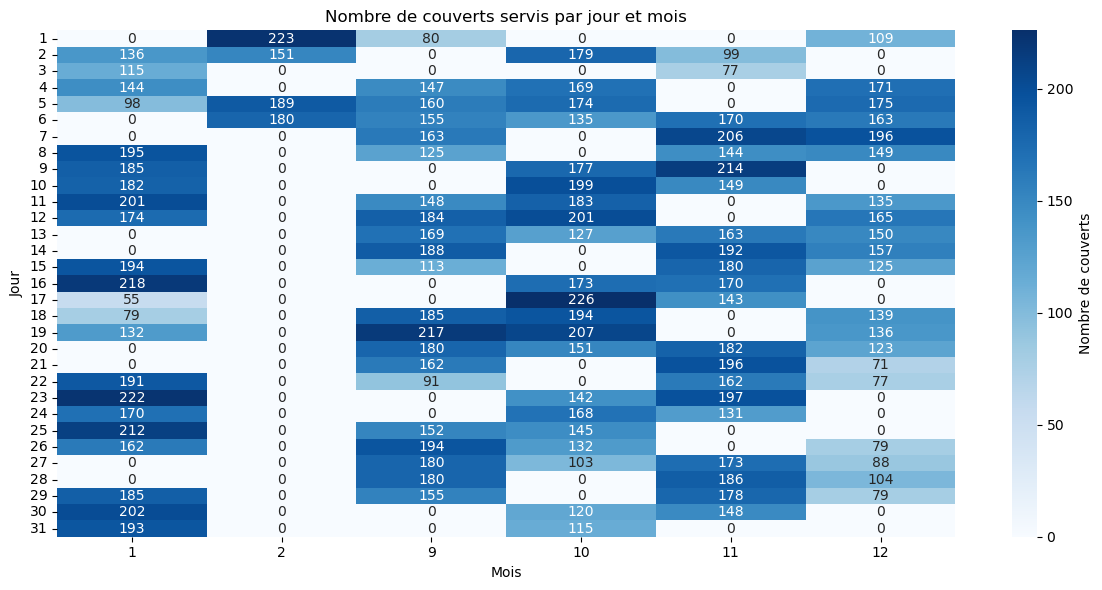

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = df_API_Journalier

# Convertir la colonne 'DATE' en datetime
df['DATE'] = pd.to_datetime(df['DATE'], dayfirst=True)

# Supprimer les lignes avec des valeurs NaN dans la colonne 'NB_COUVERTS'
df = df.dropna(subset=['NB_COUVERTS'])

# Créer une nouvelle colonne pour extraire le jour de la date
df['JOUR'] = df['DATE'].dt.day

# Créer une nouvelle colonne pour extraire le mois de la date
df['MOIS'] = df['DATE'].dt.month

# Créer une nouvelle colonne pour extraire l'année de la date
df['ANNEE'] = df['DATE'].dt.year

# Créer un pivot table pour avoir les couverts servis par jour et mois
pivot_table = df.pivot_table(index='JOUR', columns='MOIS', values='NB_COUVERTS', aggfunc='sum')

# Remplacer les valeurs NaN par 0
pivot_table.fillna(0, inplace=True)

# Créer un heatmap avec seaborn
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f', cbar_kws={'label': 'Nombre de couverts'})
plt.title('Nombre de couverts servis par jour et mois')
plt.xlabel('Mois')
plt.ylabel('Jour')
plt.tight_layout()
plt.show()

In [ ]:
df_API_Mensuel = df_API_Mensuel.head(25)
df_API_Mensuel

,MOIS,NB_COUVERTS
0,janv-22,2145.0
1,févr-22,2530.0
2,mars-22,3394.0
3,avr-22,2576.0
4,mai-22,2989.0
5,juin-22,3141.0
6,juil-22,2438.0
7,août-22,2369.0
8,sept-22,3589.0
9,oct-22,3192.0


In [ ]:
df_olga.columns

Index(['ID_AGENT', 'DATE_DEMI_J', 'ID_MOTIF', 'LIB_MOTIF', 'TYPE_PRESENCE',
       'ORIGINE', 'DT_TRAITEMENT', 'Moment'],
      dtype='object')

In [ ]:

# Définir la fonction pour anonymiser les identifiants des agents
def anonymize_id(id):
    # Utiliser la fonction de hashage pour transformer l'ID en une valeur hash
    hashed_id = hash(str(id))
    # Assurer que l'ID est toujours positif
    anonymized_id = abs(hashed_id)
    # Limiter la longueur à 7 chiffres
    anonymized_id = anonymized_id % (10**7)
    return anonymized_id

# Créer un dictionnaire pour mapper les anciens identifiants aux nouveaux identifiants anonymisés
id_mapping = {}

# Appliquer la fonction d'anonymisation à la colonne 'ID_AGENT' et mettre à jour le dictionnaire de mappage
df_olga['ID_AGENT'] = df_olga['ID_AGENT'].apply(lambda x: id_mapping.setdefault(x, anonymize_id(x)))

# Afficher le DataFrame avec les identifiants anonymisés
df_olga.head(100)

,ID_AGENT,DATE_DEMI_J,ID_MOTIF,LIB_MOTIF,TYPE_PRESENCE,ORIGINE,DT_TRAITEMENT,Moment
0,5374336,2023-01-01,30,Repos Hebdomadaire,A,fiches,19/01/2024,Matin
1,2122352,2023-01-01,30,Repos Hebdomadaire,A,fiches,19/01/2024,Matin
2,2606589,2023-01-01,30,Repos Hebdomadaire,A,fiches,19/01/2024,Matin
3,8805393,2023-01-01,30,Repos Hebdomadaire,A,fiches,19/01/2024,Matin
4,3982125,2023-01-01,30,Repos Hebdomadaire,A,fiches,19/01/2024,Matin
...,...,...,...,...,...,...,...,...
95,4745804,2023-01-01,30,Repos Hebdomadaire,A,fiches,19/01/2024,Matin
96,2904174,2023-01-01,30,Repos Hebdomadaire,A,fiches,19/01/2024,Matin
97,9485261,2023-01-01,30,Repos Hebdomadaire,A,fiches,19/01/2024,Matin
98,9371245,2023-01-01,30,Repos Hebdomadaire,A,fiches,19/01/2024,Matin


In [ ]:
# Inspecter chaque colonne : 
for value in df_olga:
    print(df_olga[value].value_counts())
    print()


ID_AGENT
3777489    1490
717664     1488
7829431    1481
5908764    1471
8864756    1470
           ... 
7693569     124
9660021     124
19697        90
9642966      80
3935059      14
Name: count, Length: 1244, dtype: int64

DATE_DEMI_J
2023-12-20    2404
2023-12-19    2403
2023-12-18    2403
2023-12-21    2403
2023-12-14    2402
              ... 
2023-01-09    2106
2023-01-08    2106
2023-01-15    2106
2023-01-02    2100
2023-01-01    2100
Name: count, Length: 731, dtype: int64

ID_MOTIF
1     497250
30    488138
29    351351
10     69341
50     46686
5      43989
7      35309
0      30492
14     15167
21     14382
4      12638
31     10424
15     10054
6       7963
11      4810
3       3515
22      3043
26      2146
12      1435
16      1335
65       923
48       890
18       844
17       803
2        711
51       650
45       550
33       472
19       352
20       295
32       205
13       200
23       143
59       134
9         99
49        98
24        80
52        63
47        

In [ ]:
# Motifs de présence correspondant à une présence sur site
motifs_sur_site = ['Lieu de travail Forfait Jour']

# Filtrer les données pour ne conserver que les motifs de présence sur site
presence_sur_site = df_olga[df_olga['LIB_MOTIF'].isin(motifs_sur_site)]

# Renommer le type de présence en 'PS' pour les motifs sur site
df_olga.loc[df_olga['LIB_MOTIF'].isin(motifs_sur_site), 'TYPE_PRESENCE'] = 'PS'

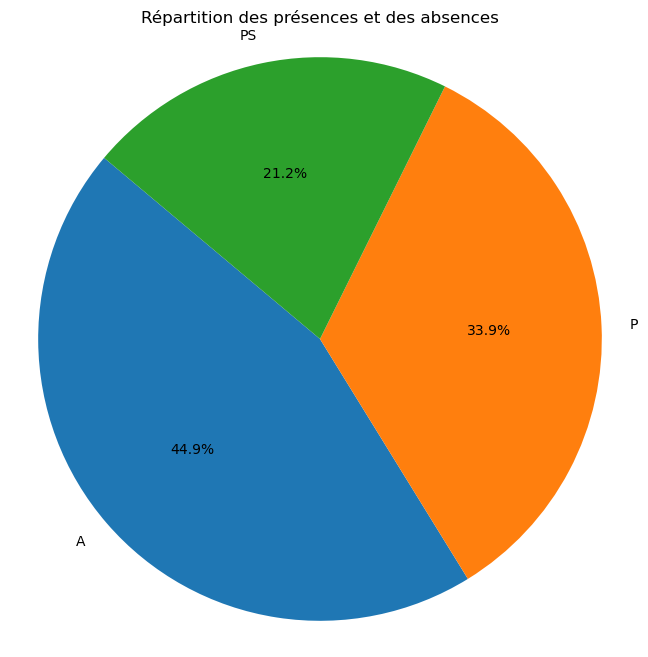

In [ ]:
# Calcul de la répartitionAmazon Redshift, SQL Server, etc.
presence_counts = df_olga['TYPE_PRESENCE'].value_counts()

# Création du diagramme à secteurs
plt.figure(figsize=(8, 8))
plt.pie(presence_counts, labels=presence_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Répartition des présences et des absences')
plt.axis('equal')
plt.show()

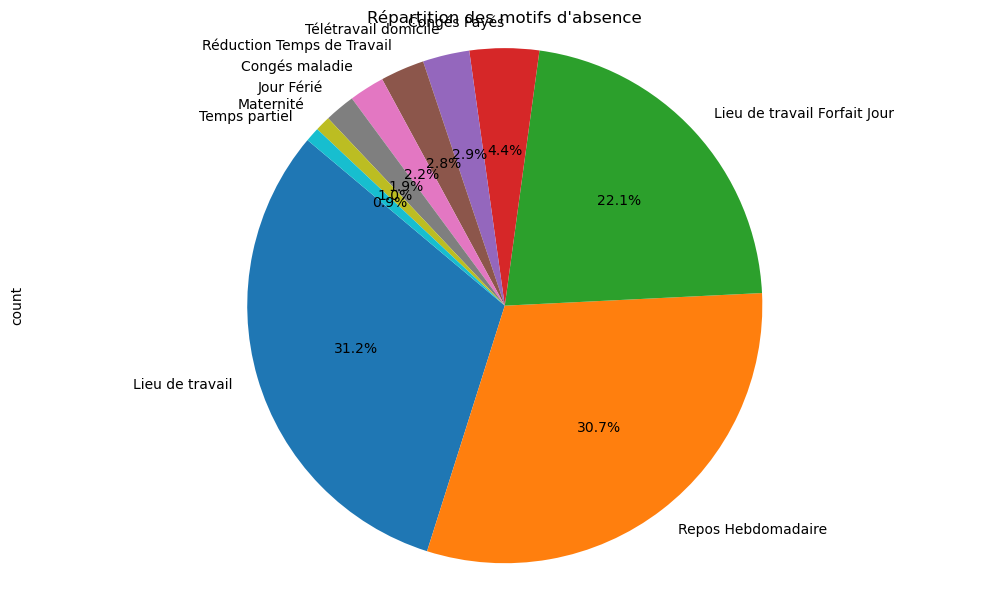

In [ ]:
# Répartition des motifs d'absence
motifs_absence = df_olga['LIB_MOTIF'].value_counts().head(10)
plt.figure(figsize=(10, 6))
motifs_absence.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Répartition des motifs d\'absence')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Vérifier les données de présence sur site
presence_data = df_olga[df_olga['TYPE_PRESENCE'] == 'PS'].groupby('LIB_MOTIF').size()
print("Données de présence sur site:")
print(presence_data)

# Vérifier les données de présence
presence_data = df_olga[df_olga['TYPE_PRESENCE'] == 'P'].groupby('LIB_MOTIF').size()
print("Données de présence :")
print(presence_data)

# Vérifier les données d'absence
absence_data = df_olga[df_olga['TYPE_PRESENCE'] == 'A'].groupby('LIB_MOTIF').size()
print("Données d'absence :")
print(absence_data)

Données de présence sur site:
LIB_MOTIF
Lieu de travail Forfait Jour    351351
dtype: int64
Données de présence :
LIB_MOTIF
Déplacement                               711
Formation                                3515
Formation en alternance                 12638
Heures Supplémentaires Récupérables        99
Lieu de travail                        497250
Réunion CSE                                63
Réunion CSSCT                               8
Réunion Commission Formation                1
Réunion Commission Marché                   3
Réunion commission CIE                     17
Travail délocalisé agence                 650
Télétravail domicile                    46686
dtype: int64
Données d'absence :
LIB_MOTIF
Absence Autre Non Payée                   205
Absence Autre Payée                       472
Absence CET                              2146
Absence Longue Durée                    10424
Absence Mandat Elu Local                   11
Absence maladie / Pandémie                134
Accid

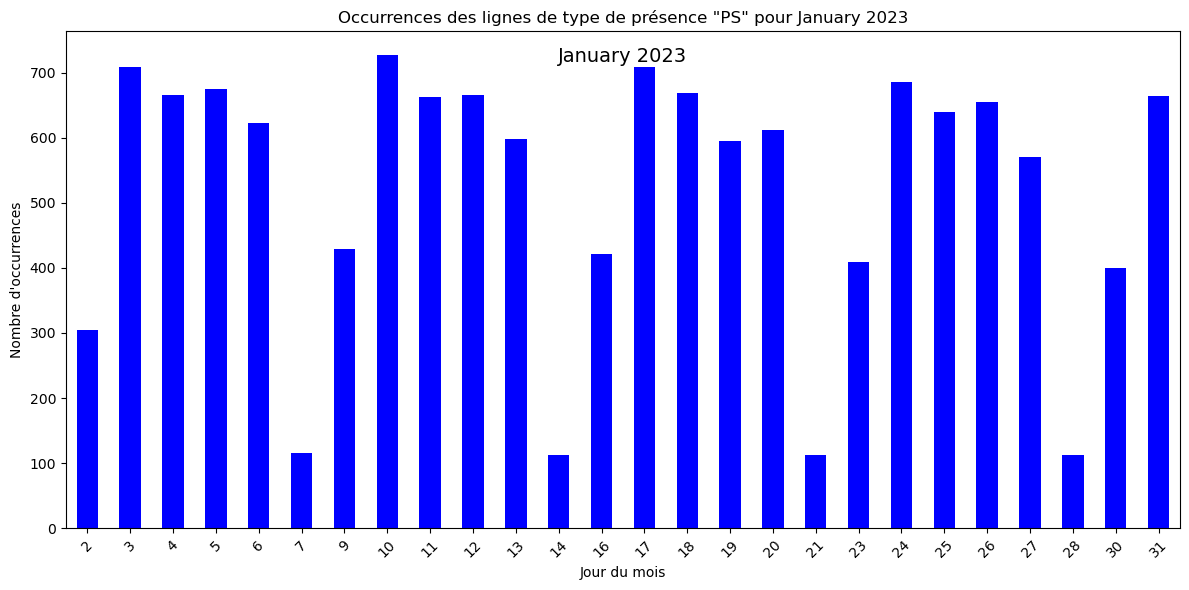

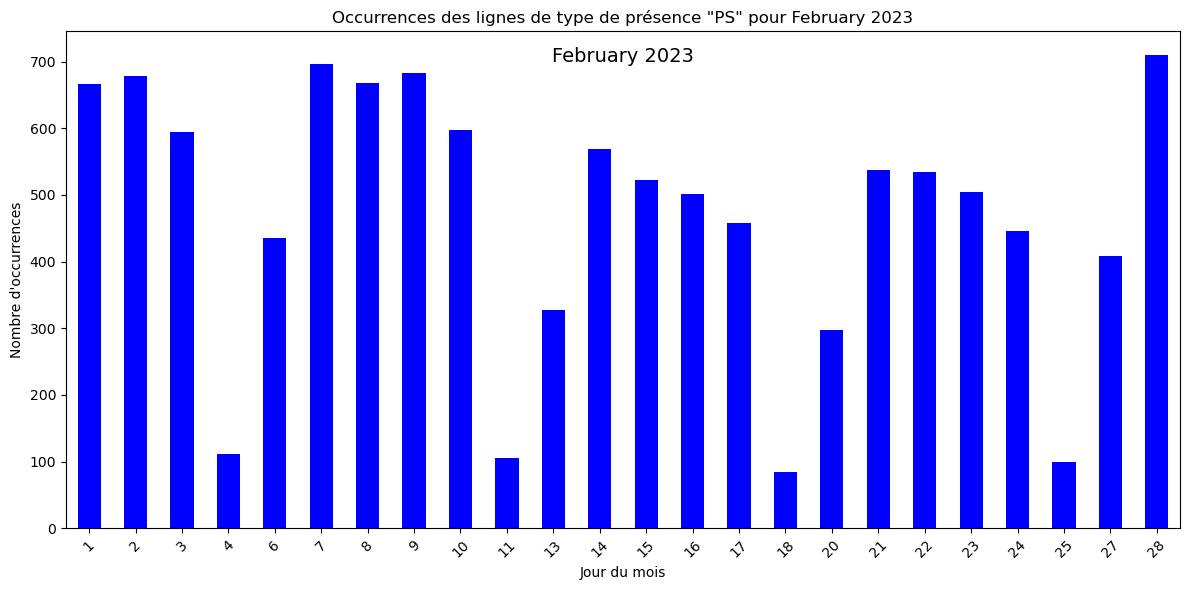

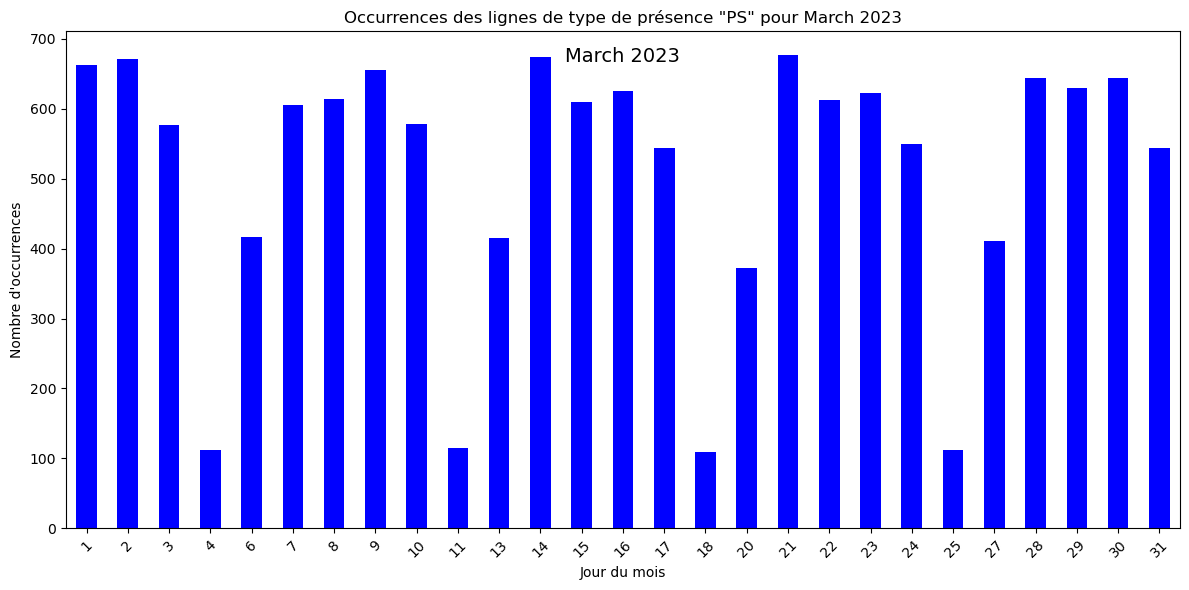

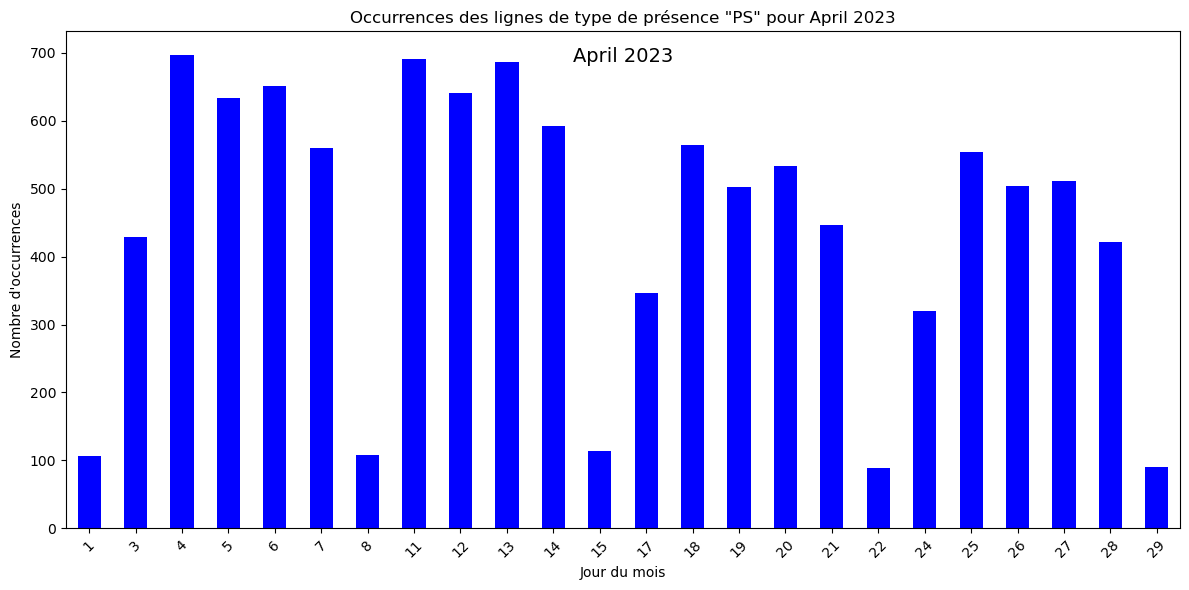

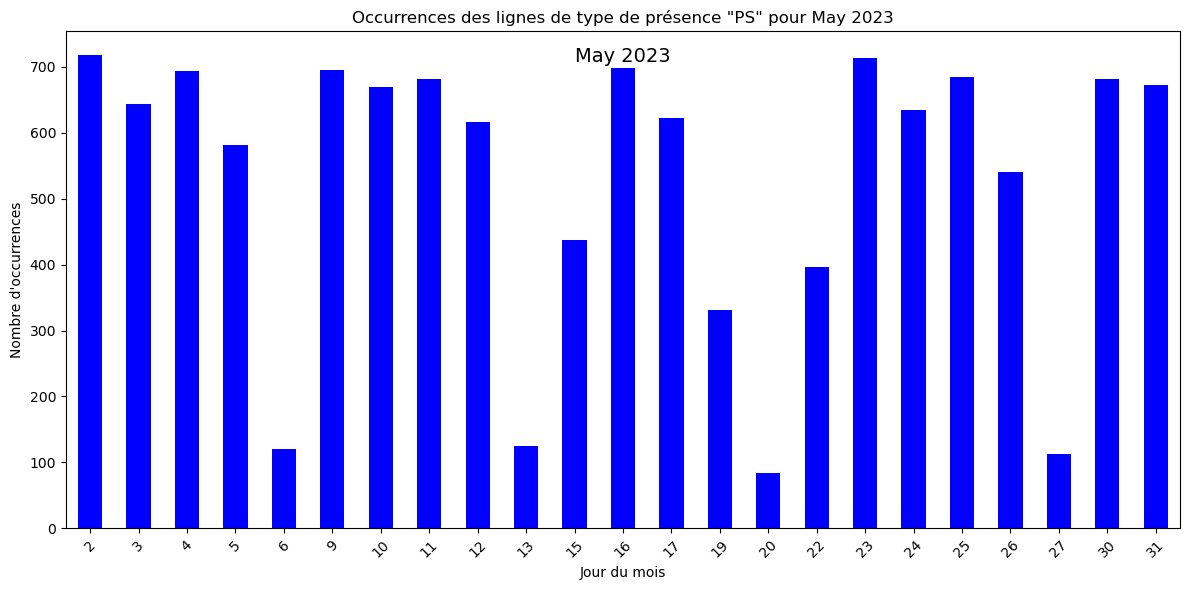

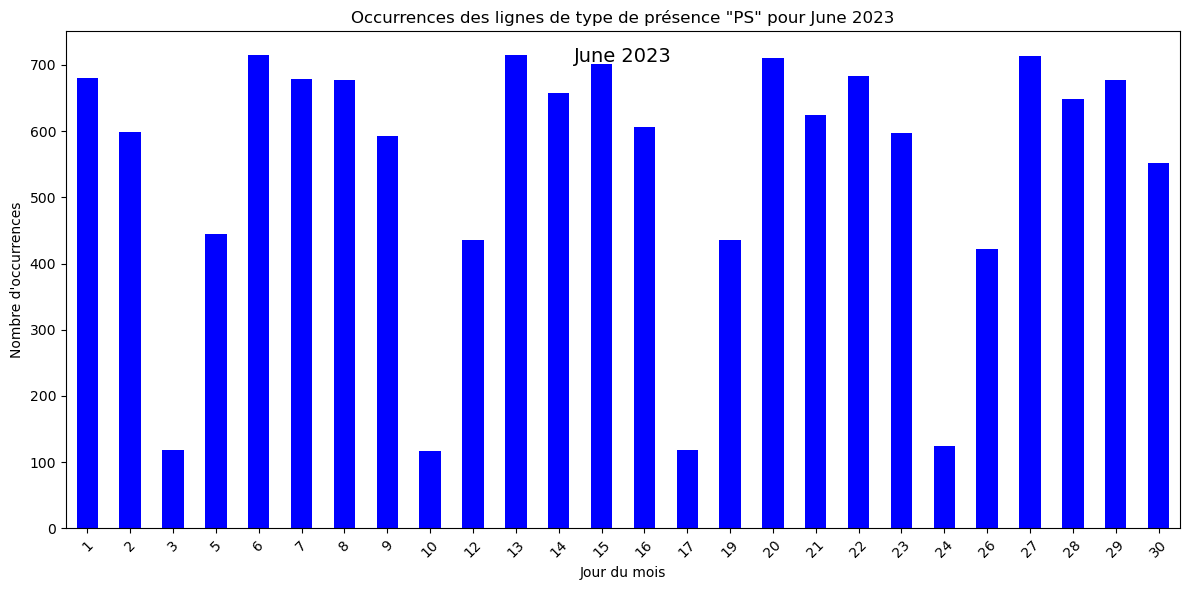

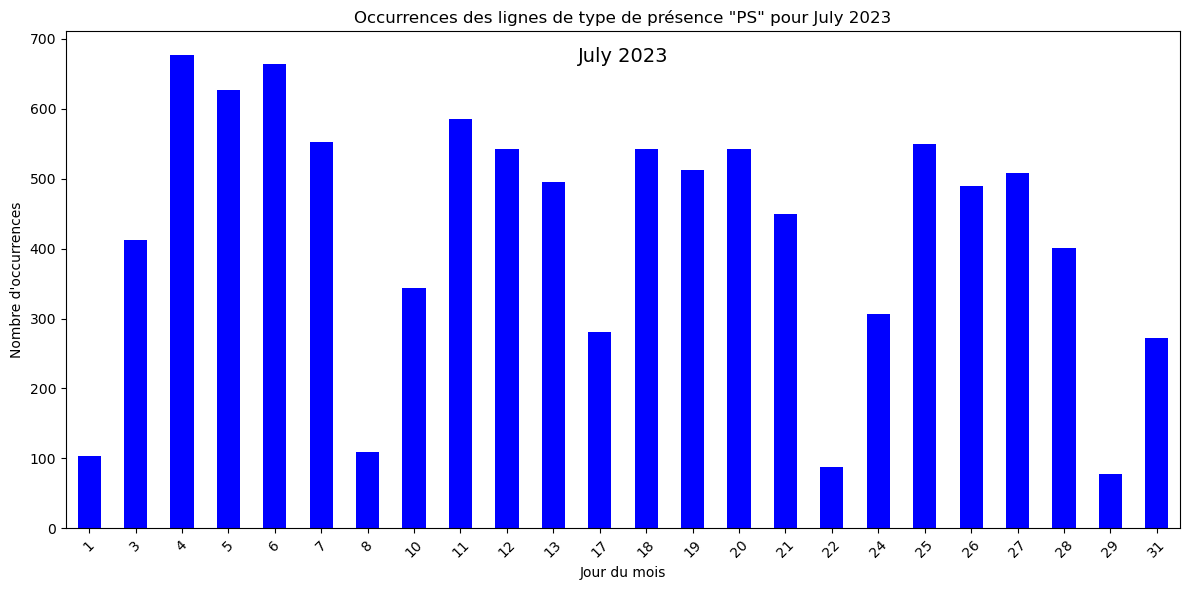

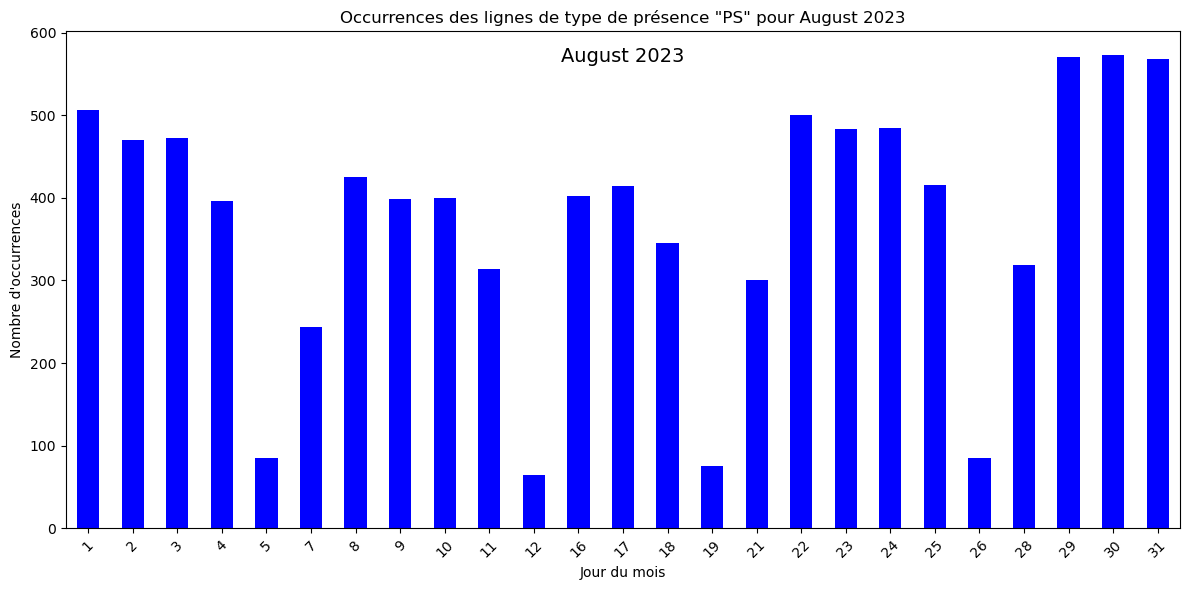

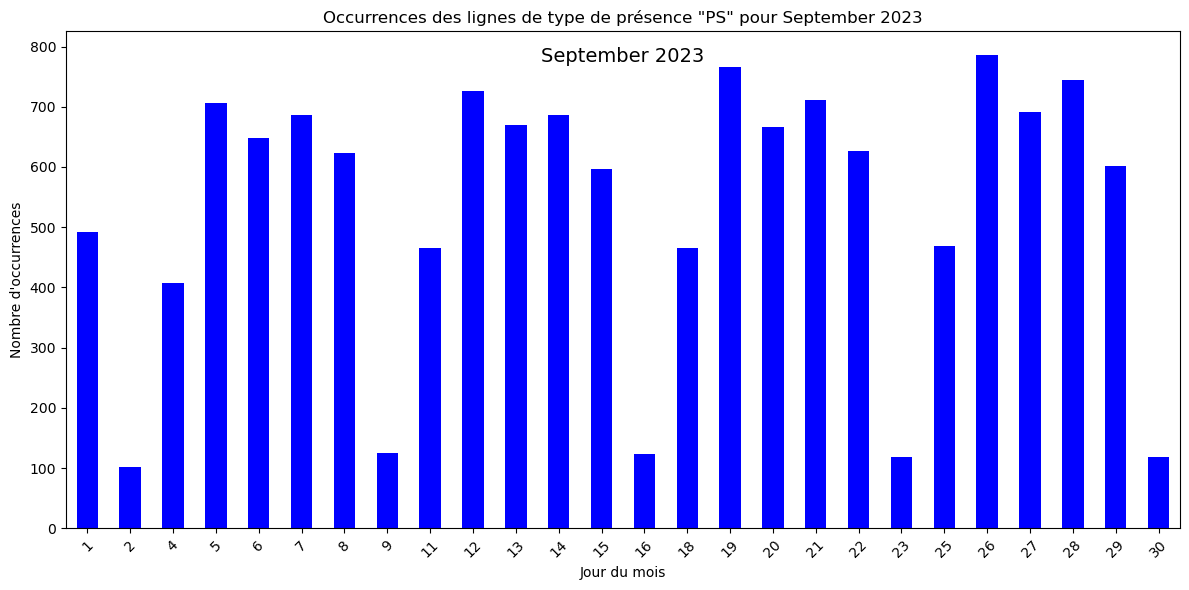

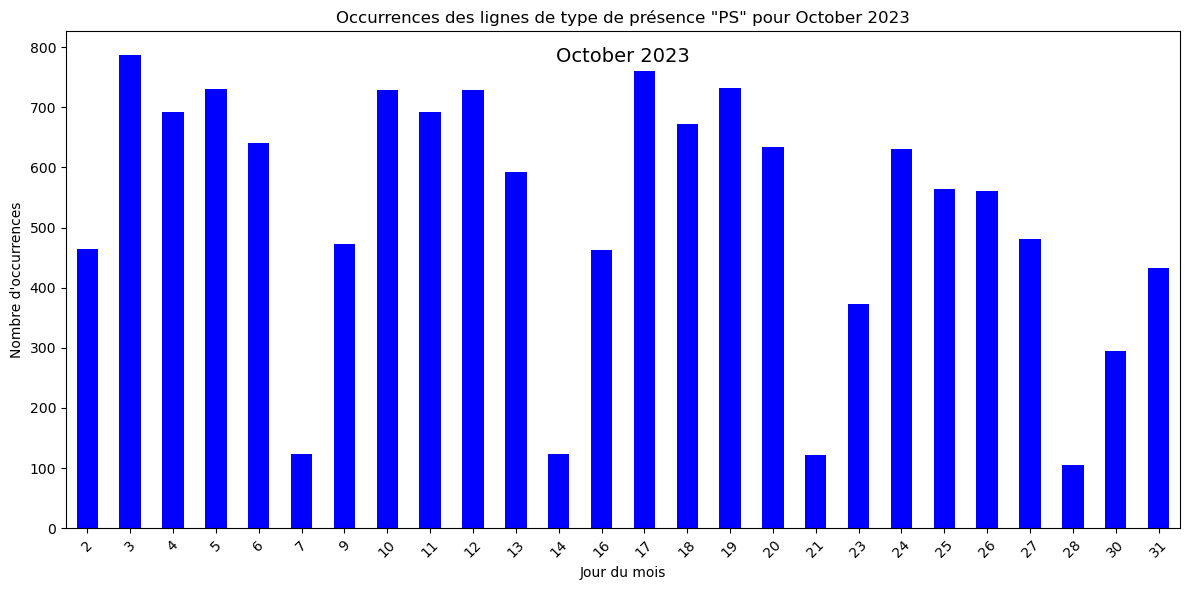

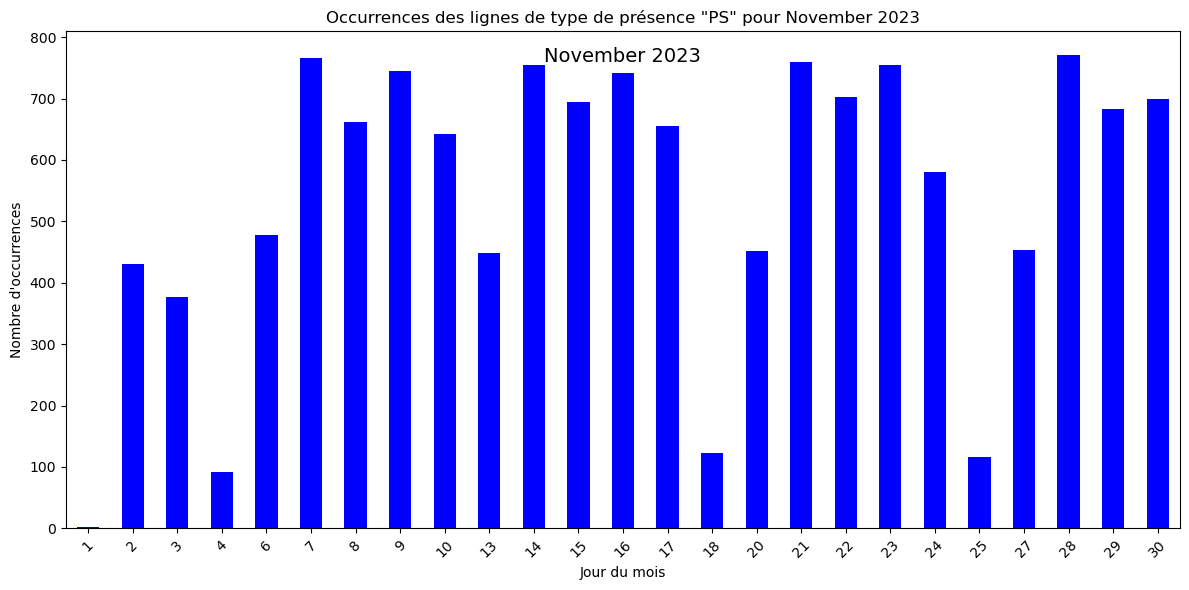

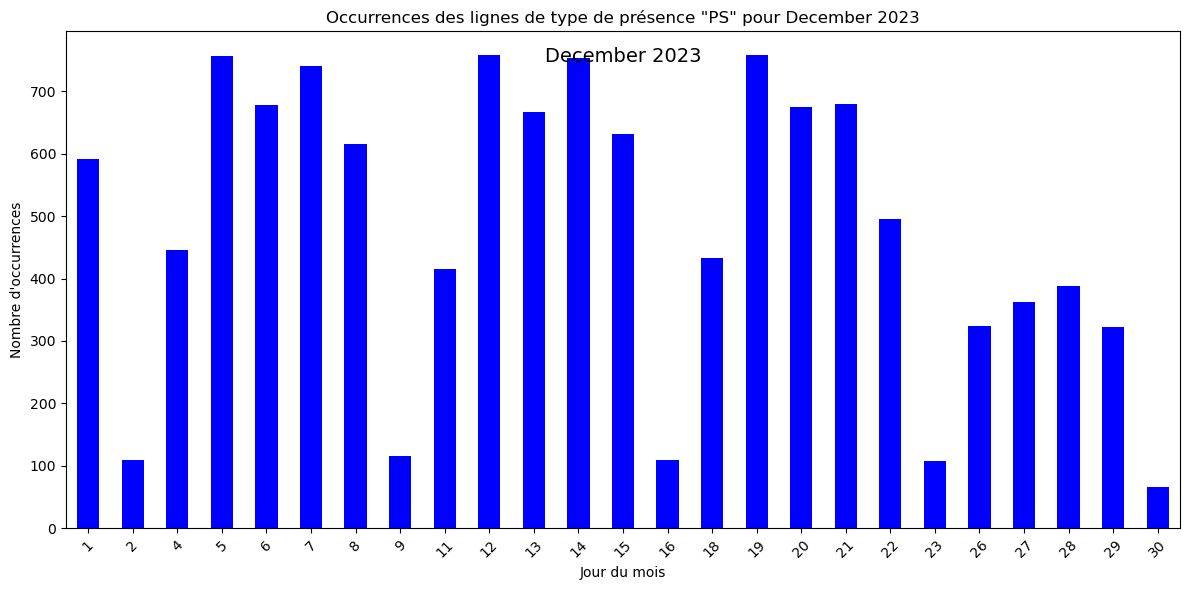

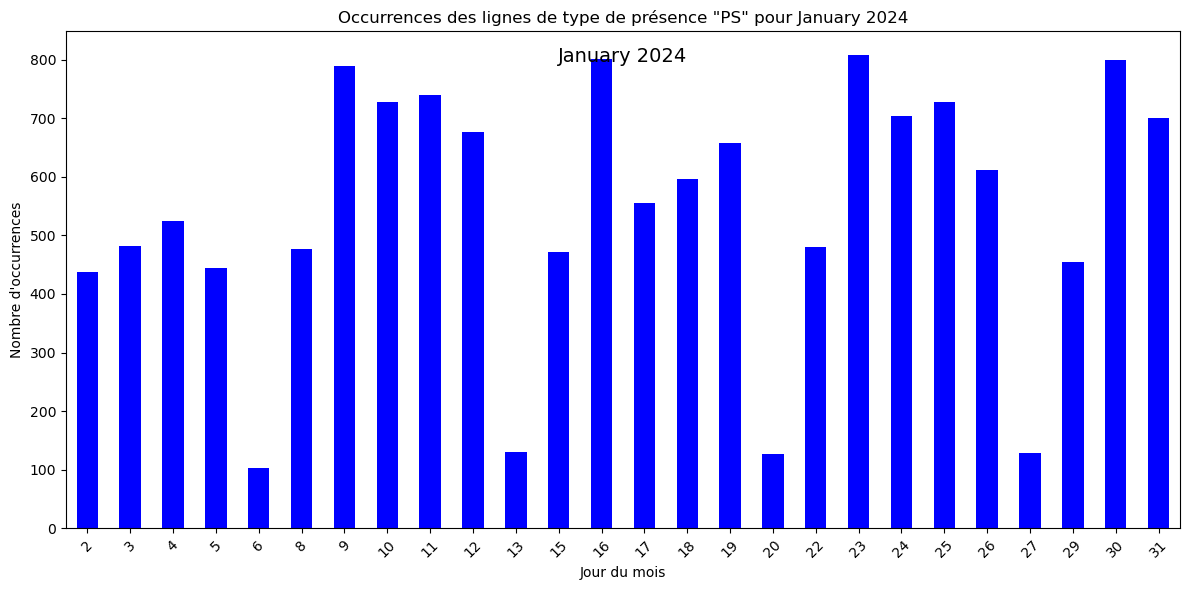

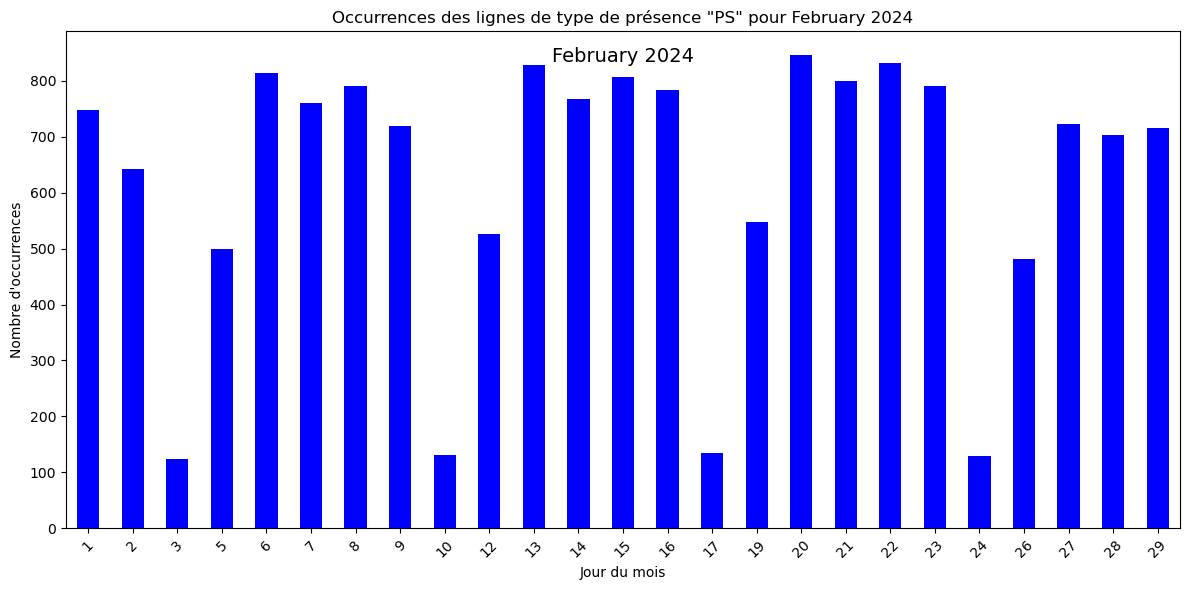

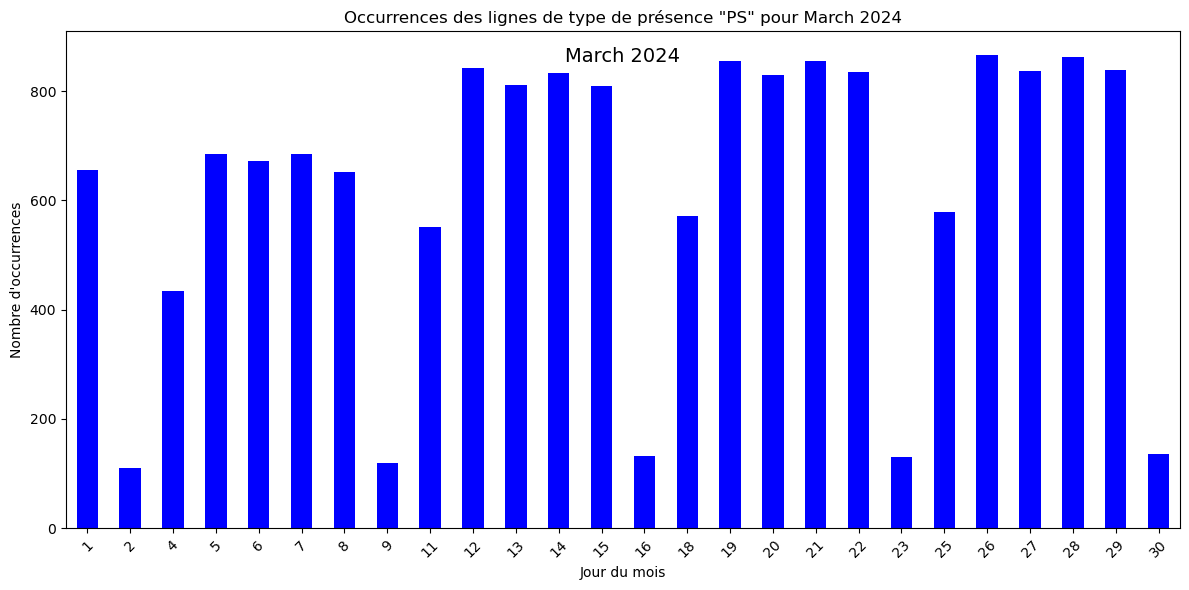

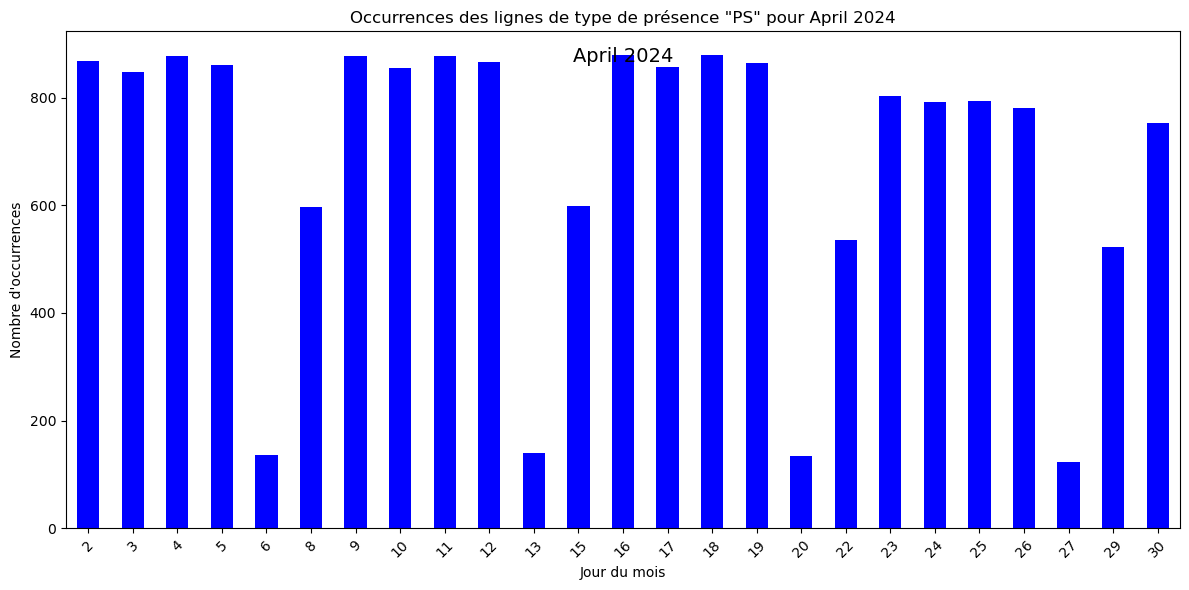

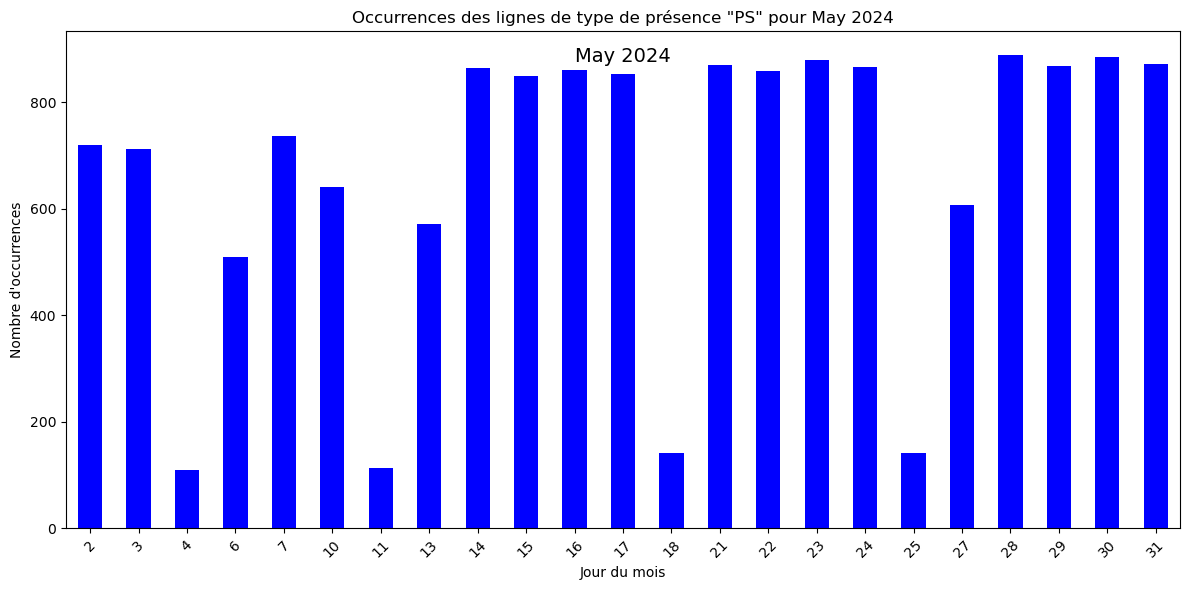

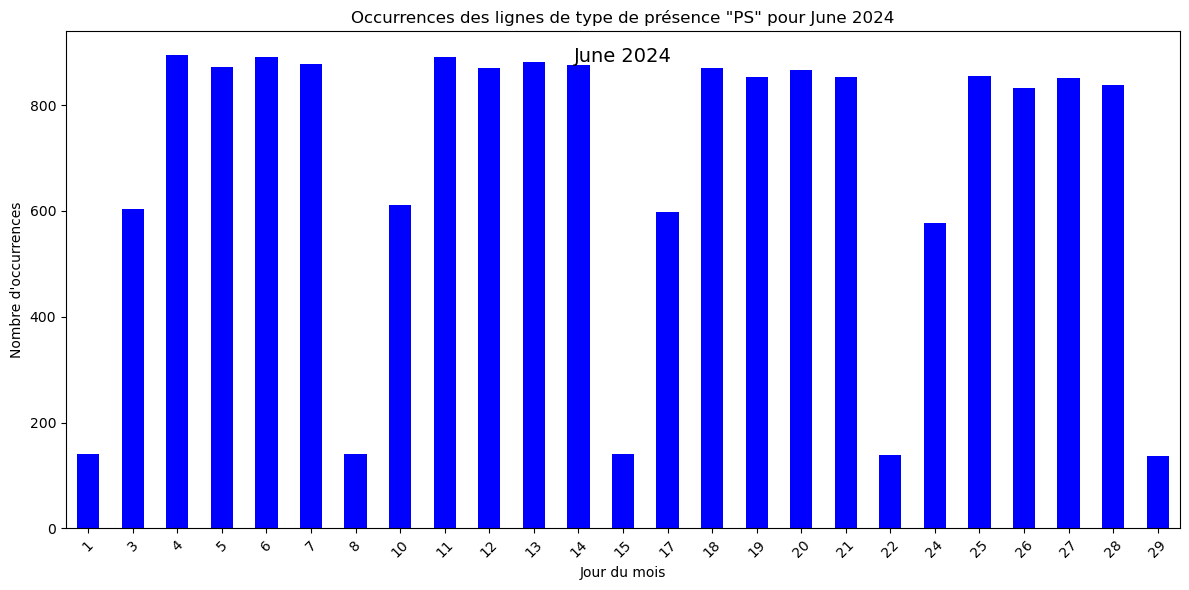

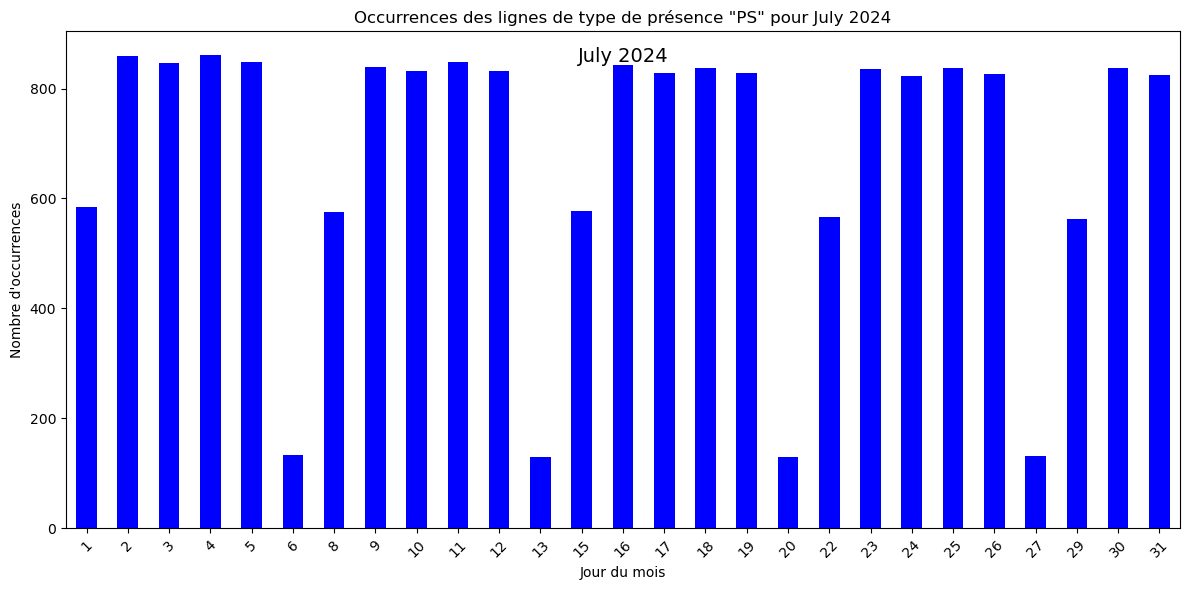

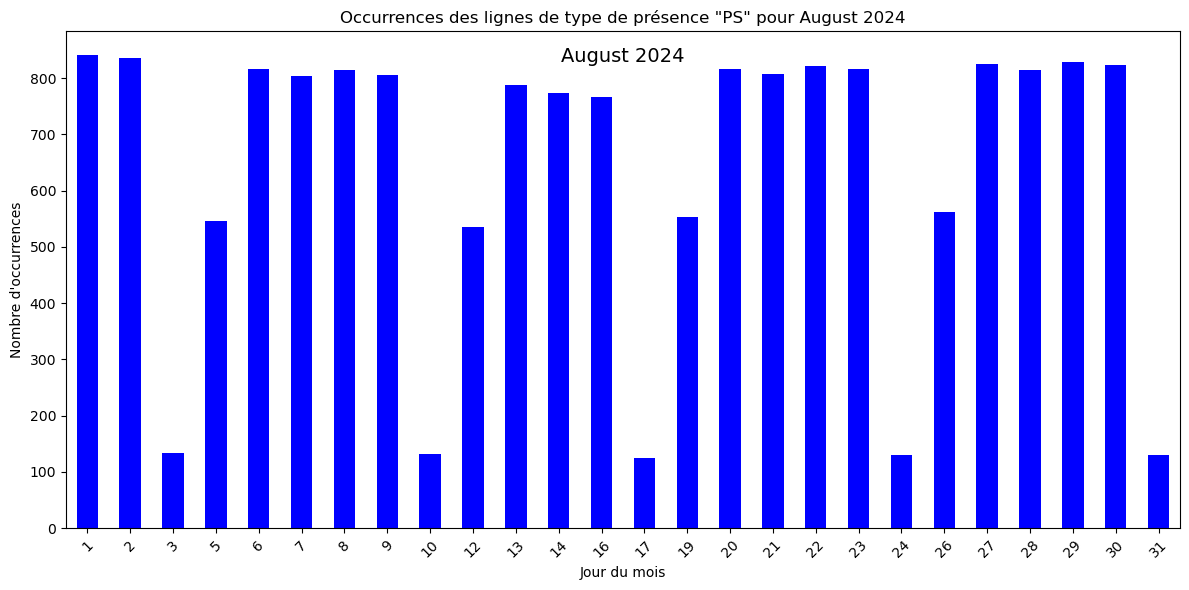

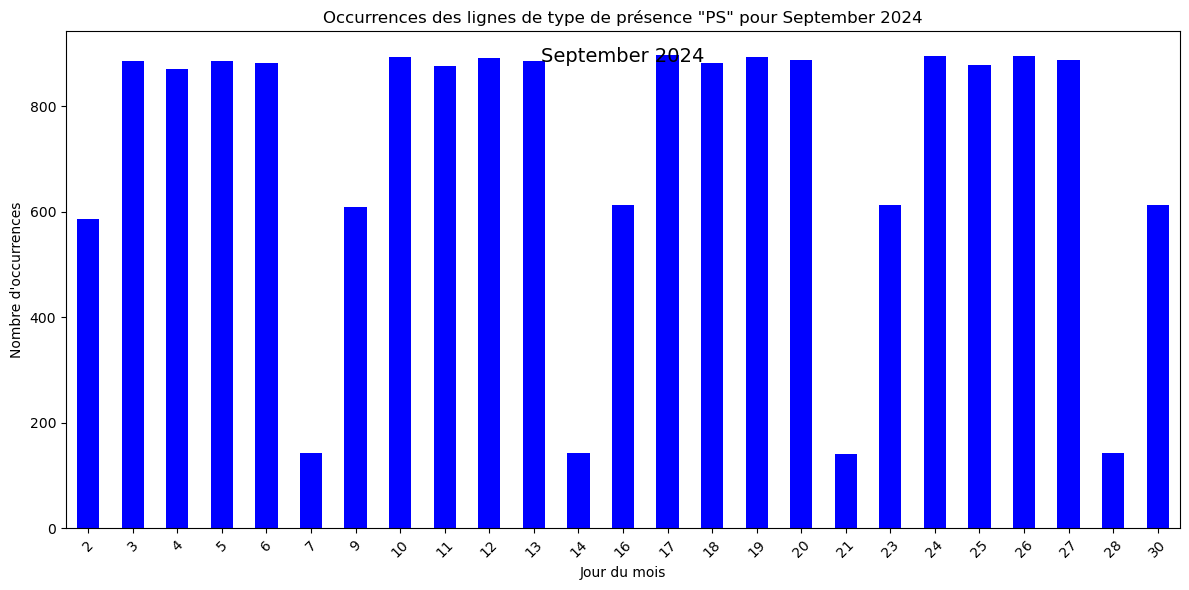

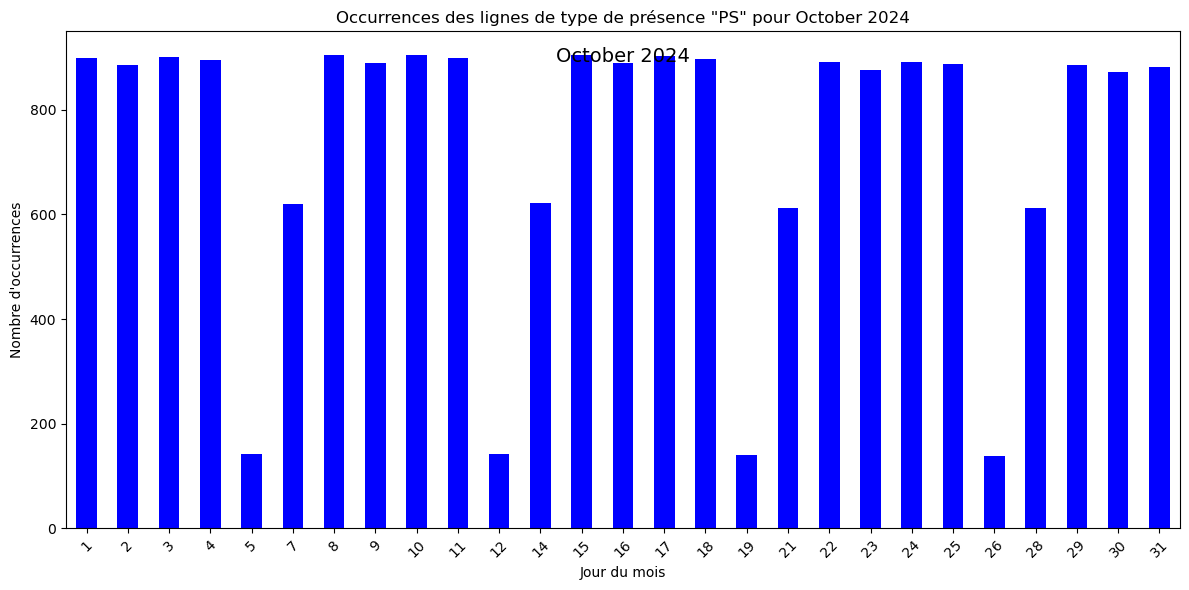

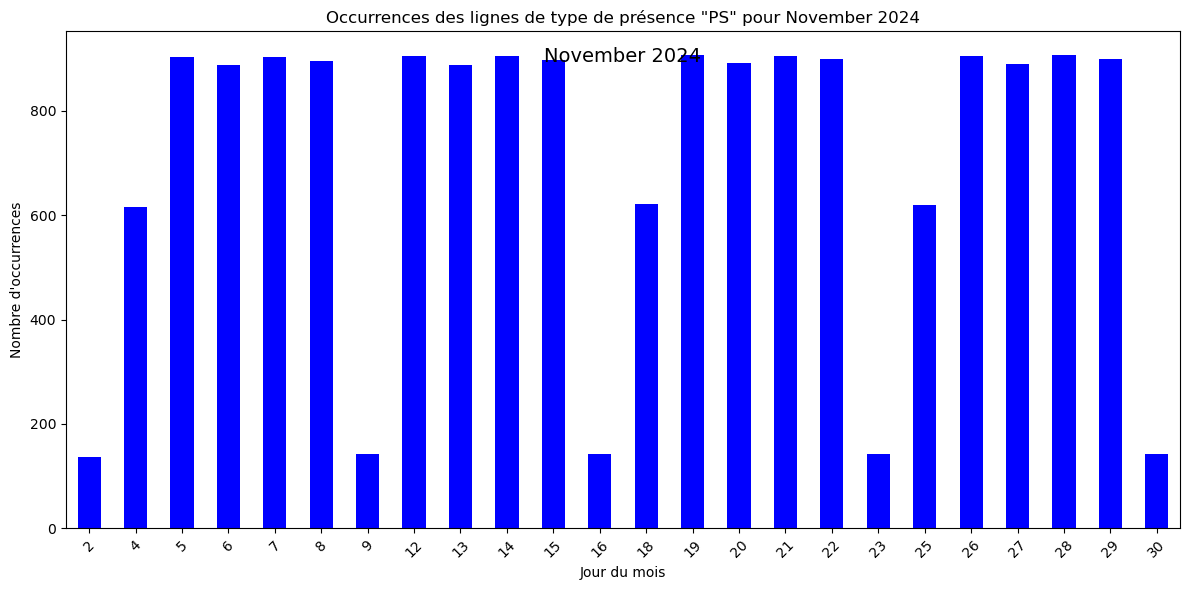

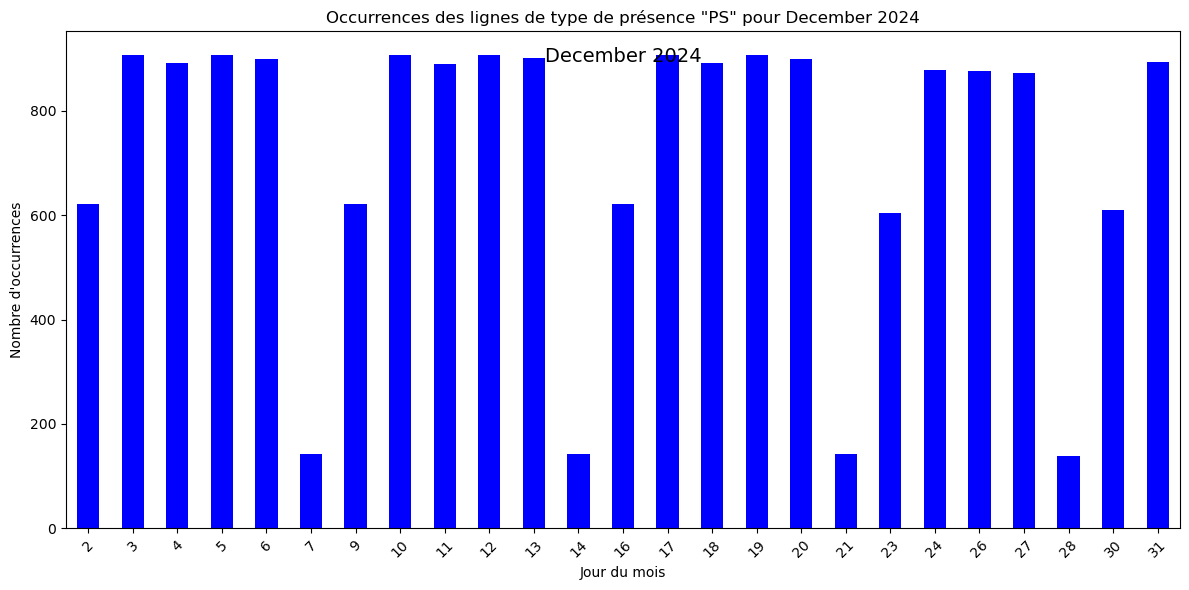

In [ ]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt

# Charger les données
df = df_olga

# Convertir la colonne 'DATE_DEMI_J' en datetime
df['DATE_DEMI_J'] = pd.to_datetime(df['DATE_DEMI_J'], dayfirst=True)

# Filtrer les données pour le type de présence "PS"
presence_data = df[df['TYPE_PRESENCE'] == 'PS']

# Itérer sur chaque mois de janvier 2023 à février 2024
for year in range(2023, 2025):
    for month in range(1, 13):
        # Filtrer les données pour le mois en cours
        presence_data_month = presence_data[(presence_data['DATE_DEMI_J'].dt.year == year) & (presence_data['DATE_DEMI_J'].dt.month == month)]
        
        # Vérifier s'il y a des données pour ce mois
        if not presence_data_month.empty:
            # Compter les occurrences par jour
            presence_per_day_month = presence_data_month.groupby(presence_data_month['DATE_DEMI_J'].dt.day).size()

            # Créer le graphique
            plt.figure(figsize=(12, 6))
            presence_per_day_month.plot(kind='bar', color='blue')
            plt.xlabel('Jour du mois')
            plt.ylabel("Nombre d'occurrences")
            plt.title(f'Occurrences des lignes de type de présence "PS" pour {calendar.month_name[month]} {year}')
            plt.xticks(rotation=45)
            
            # Ajouter le texte pour indiquer le mois et l'année
            plt.text(0.5, 0.95, f"{calendar.month_name[month]} {year}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14)
            
            plt.tight_layout()
            plt.show()



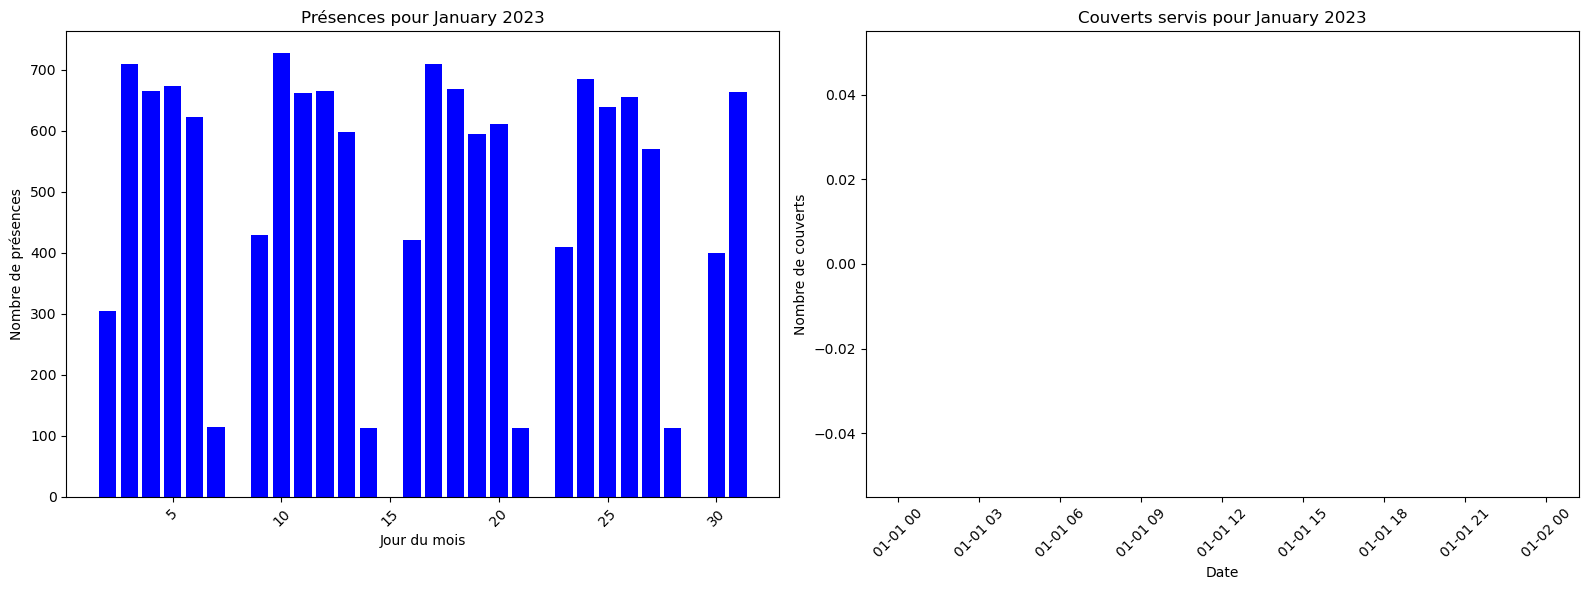

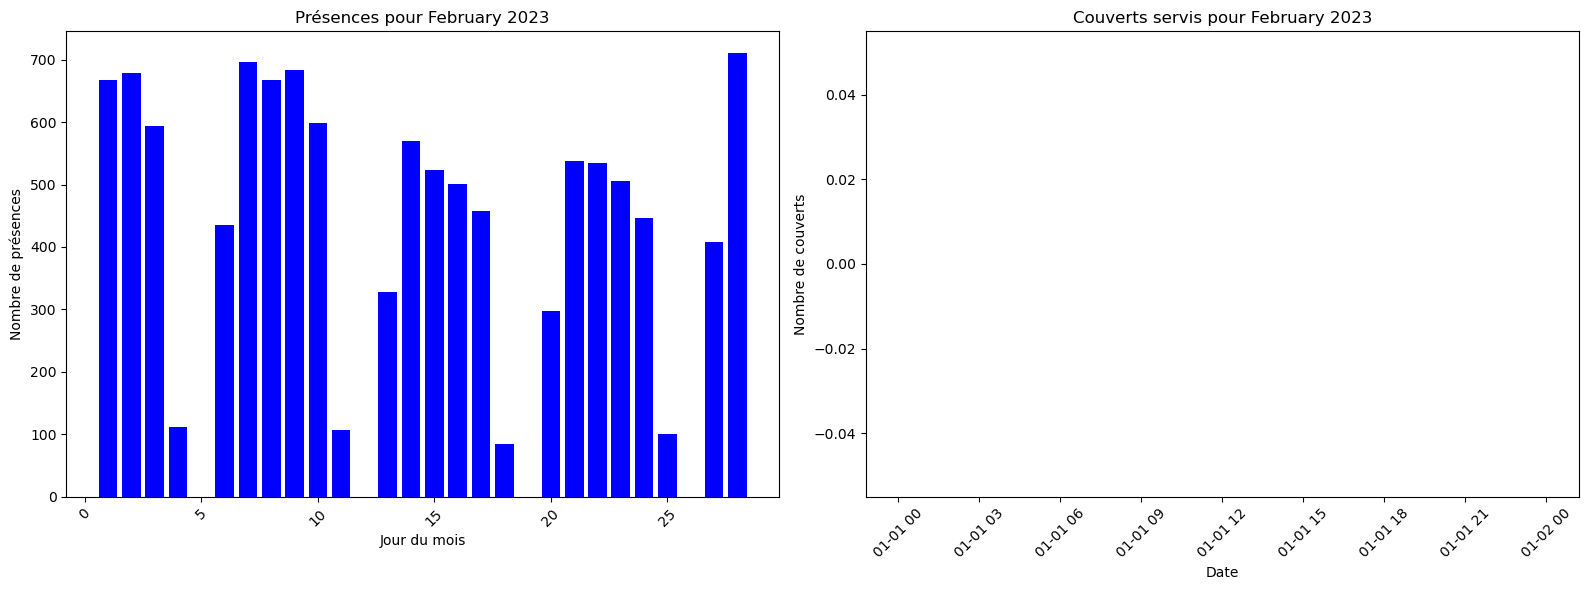

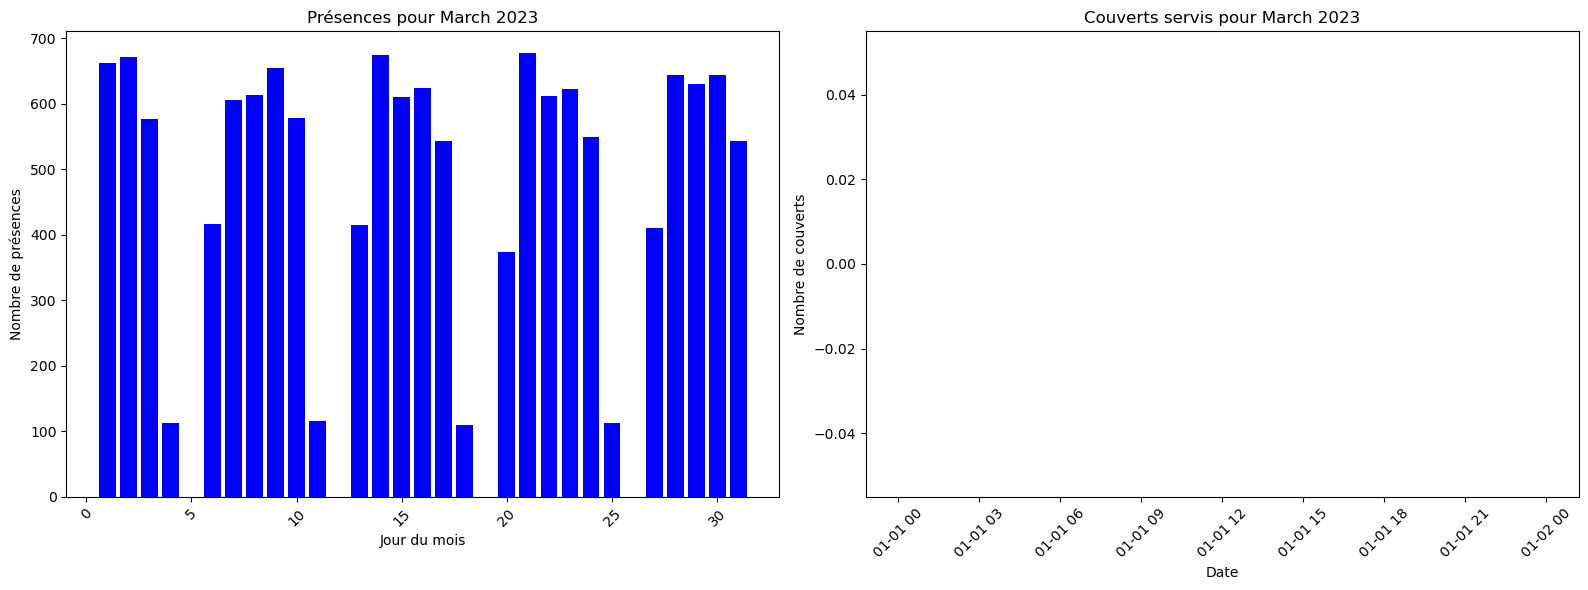

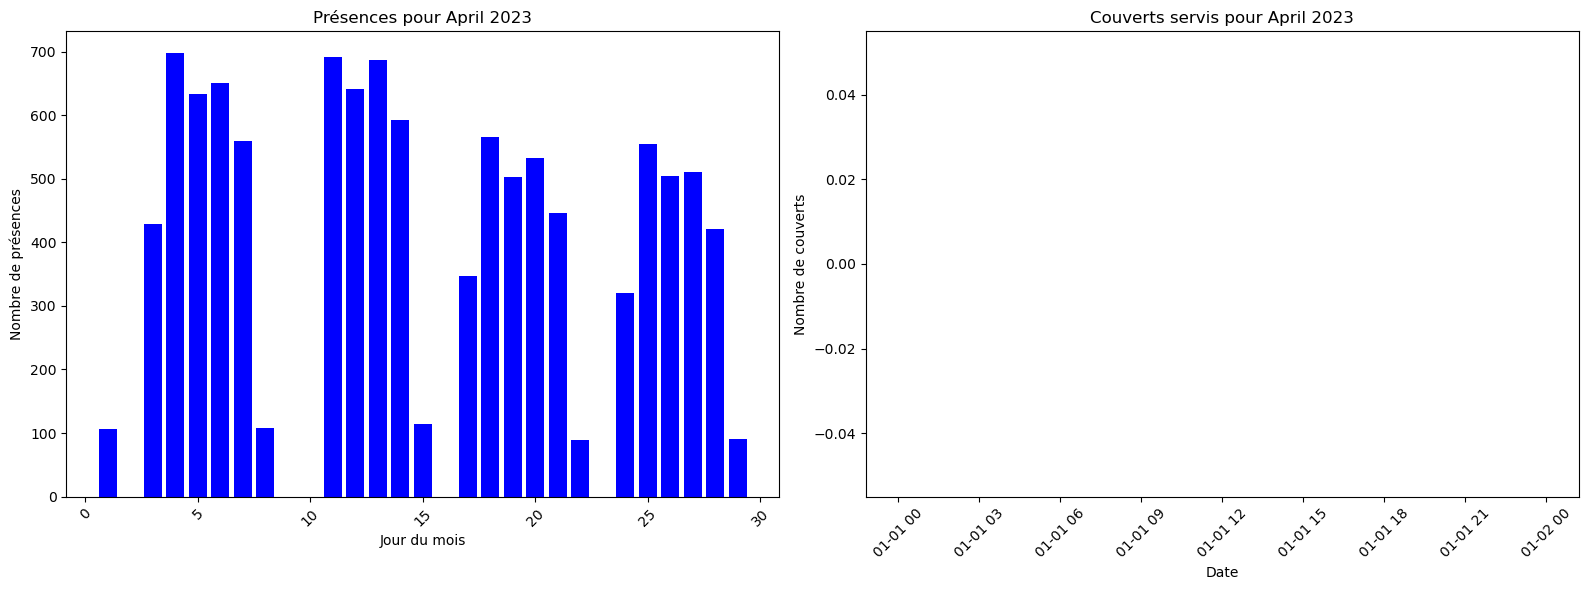

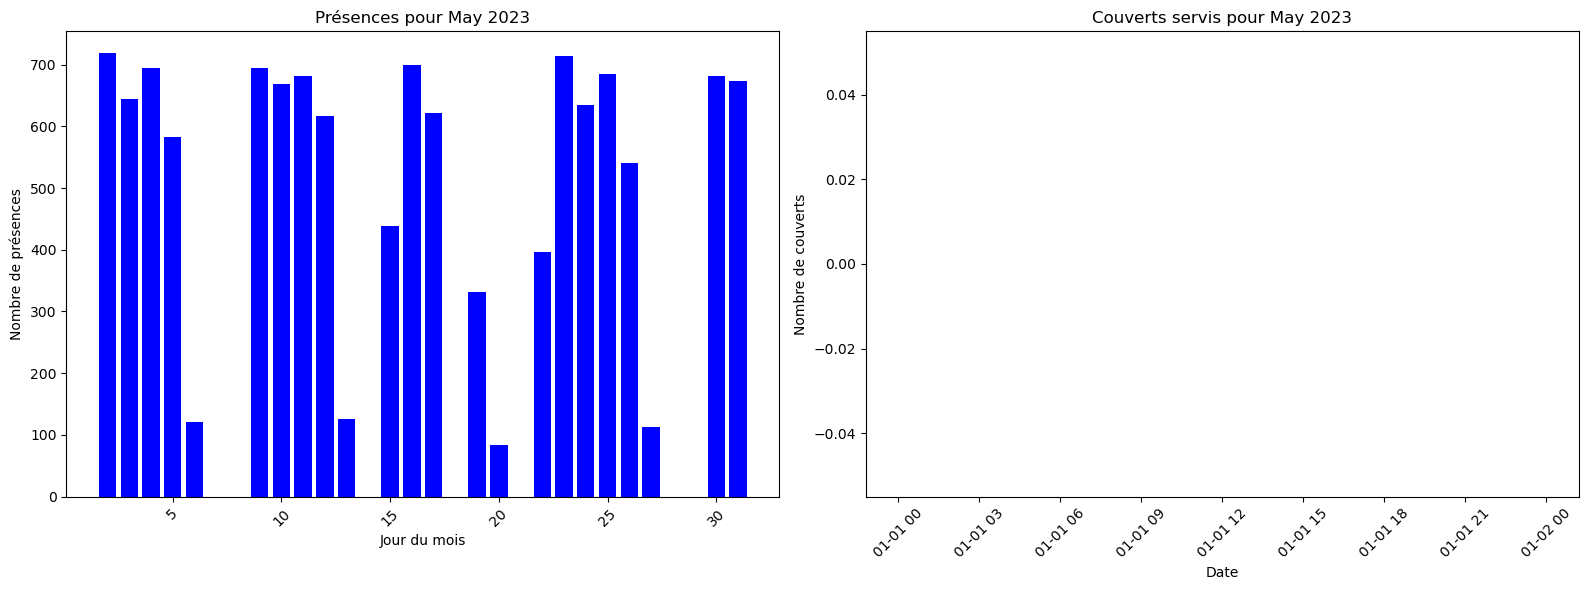

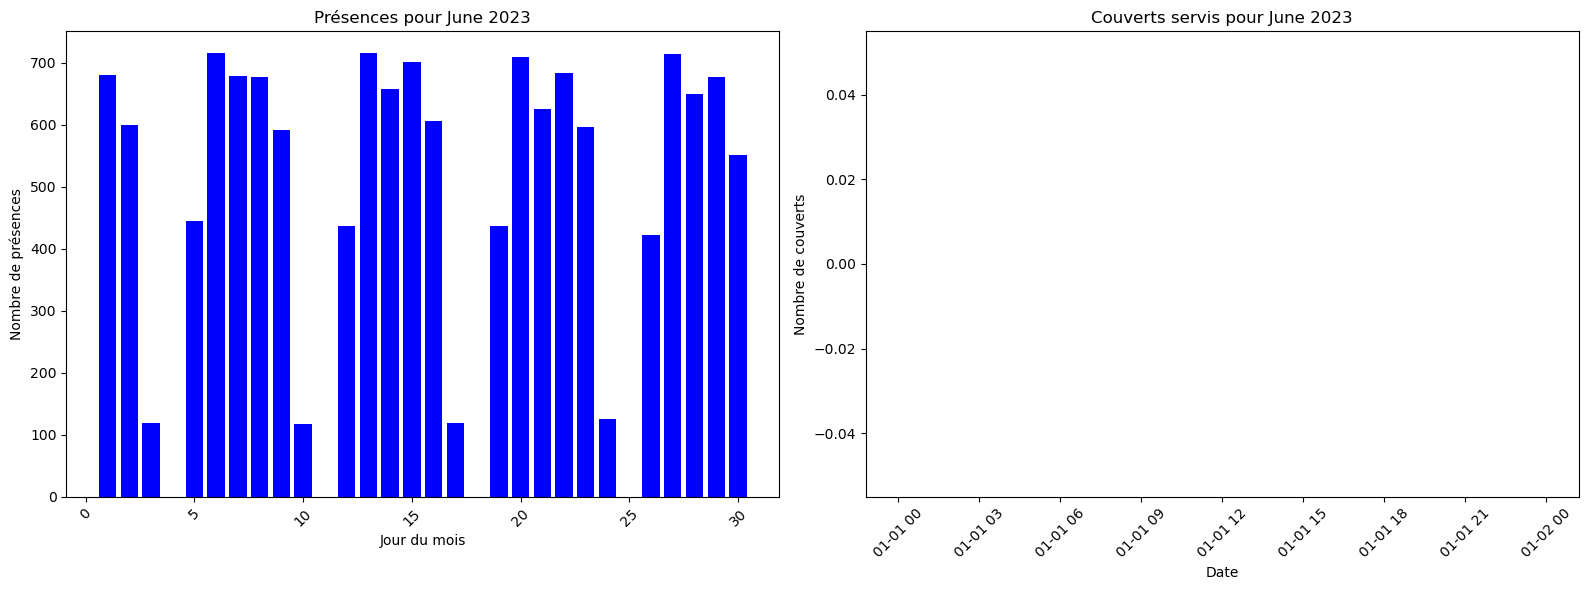

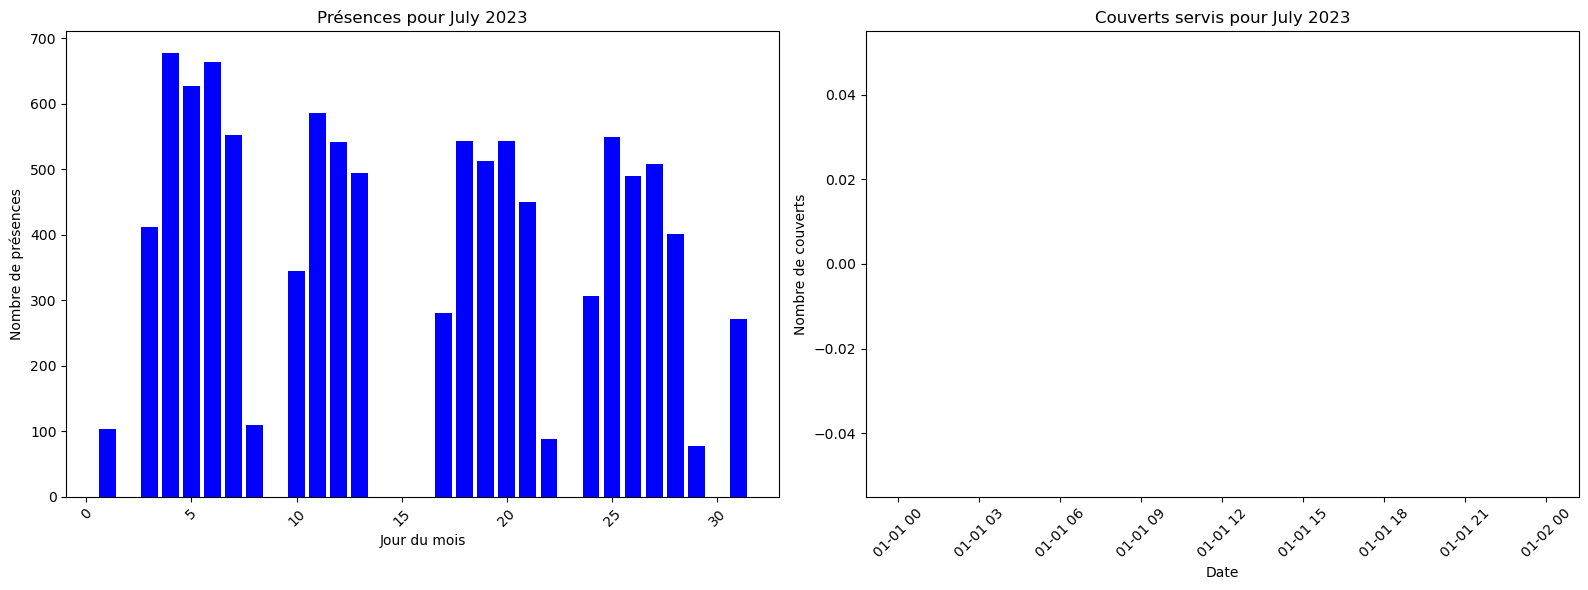

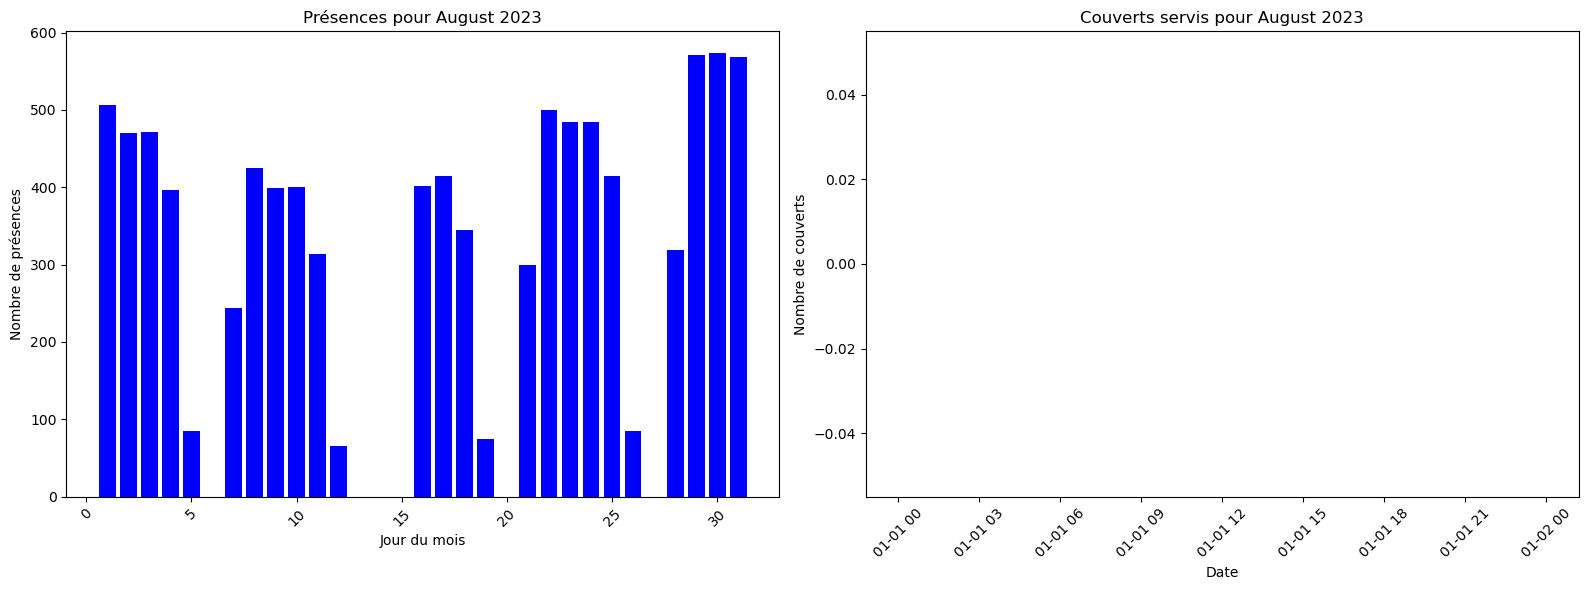

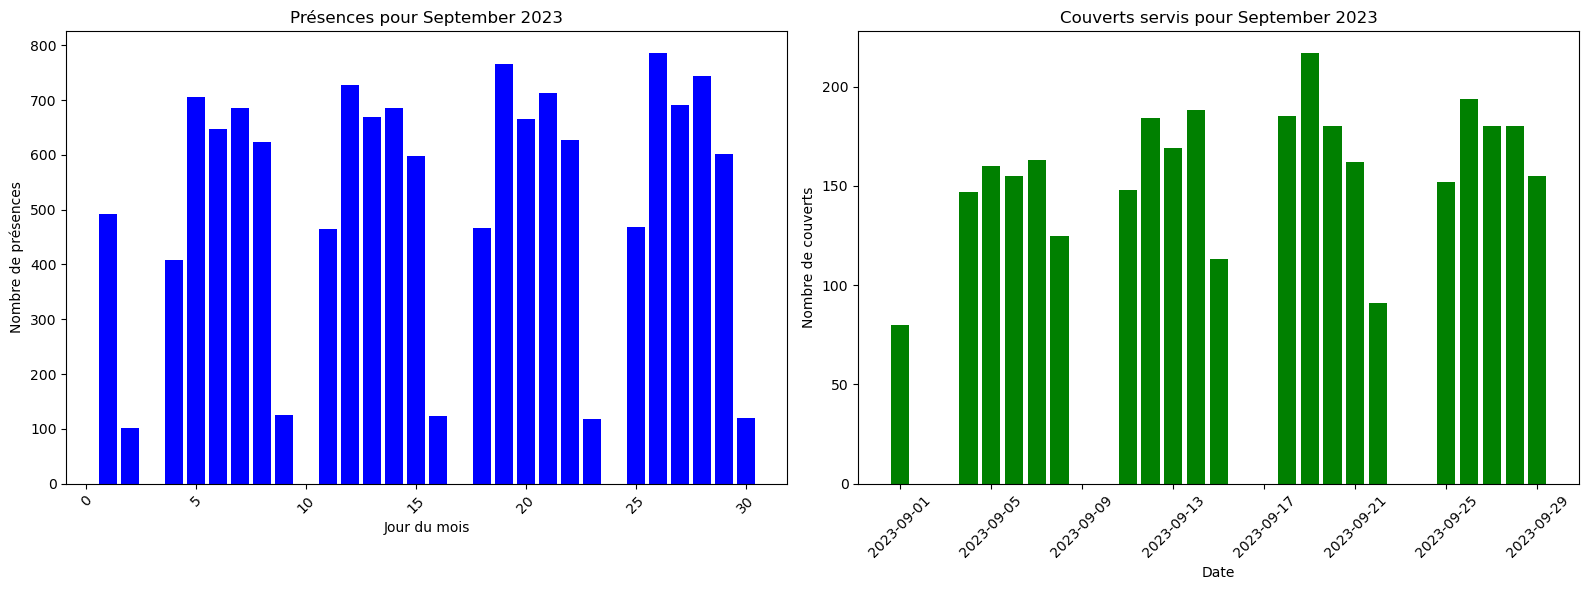

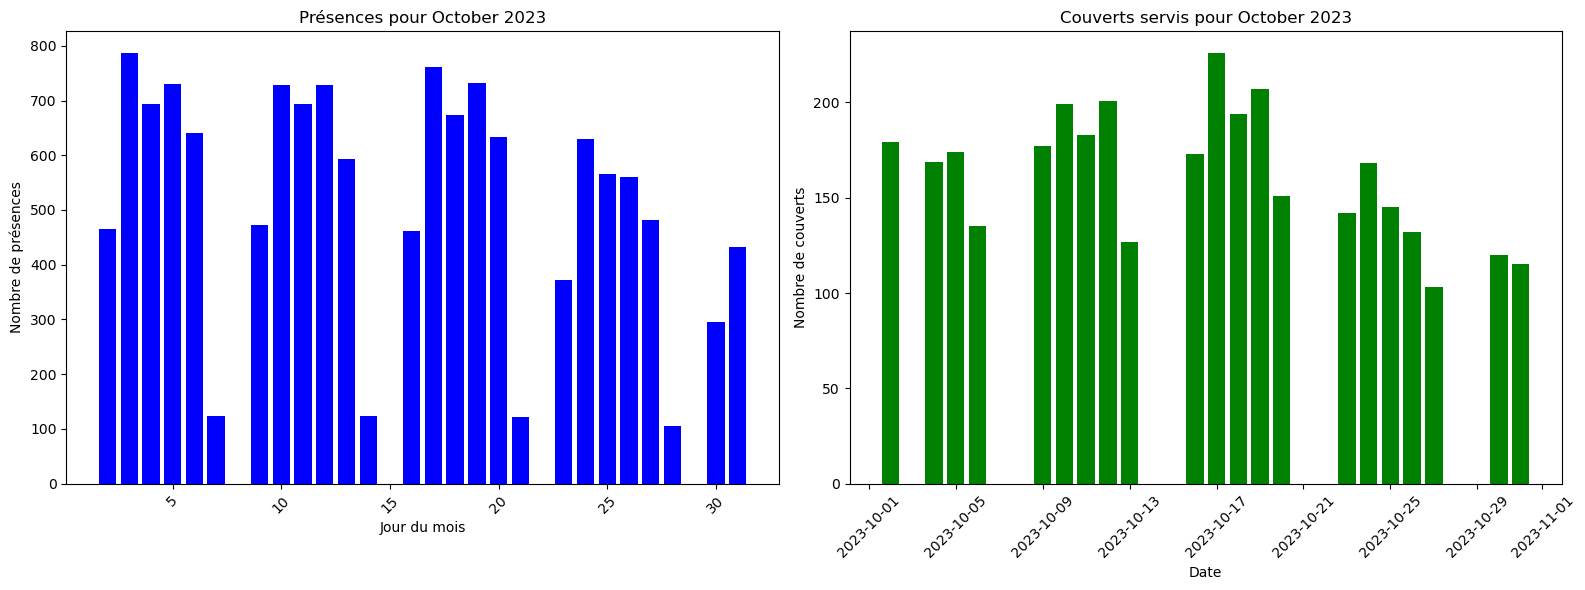

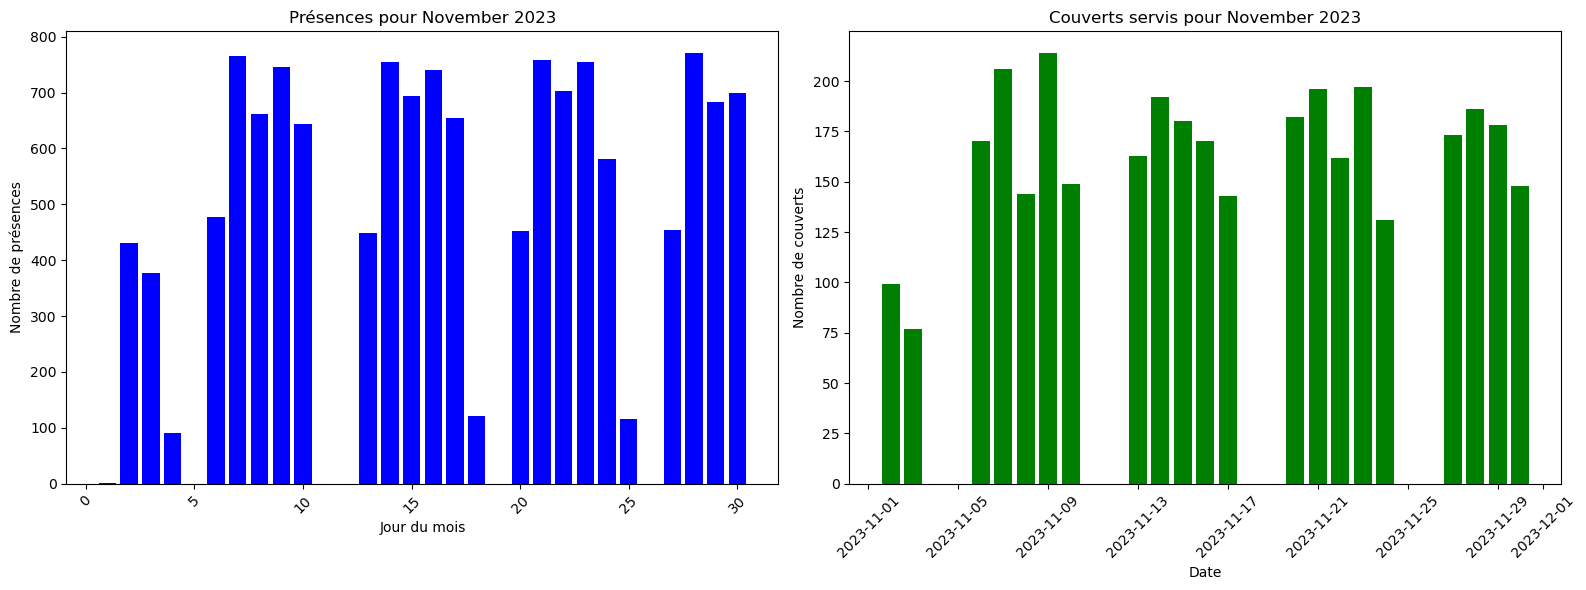

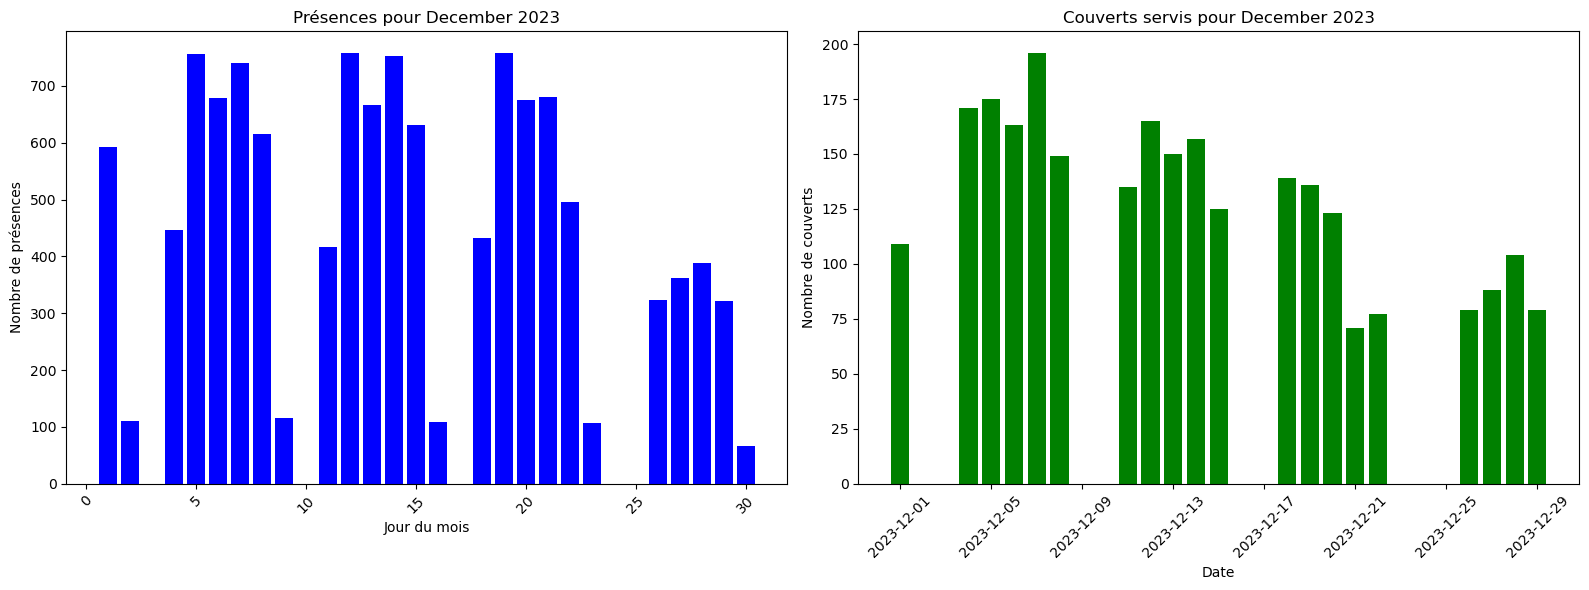

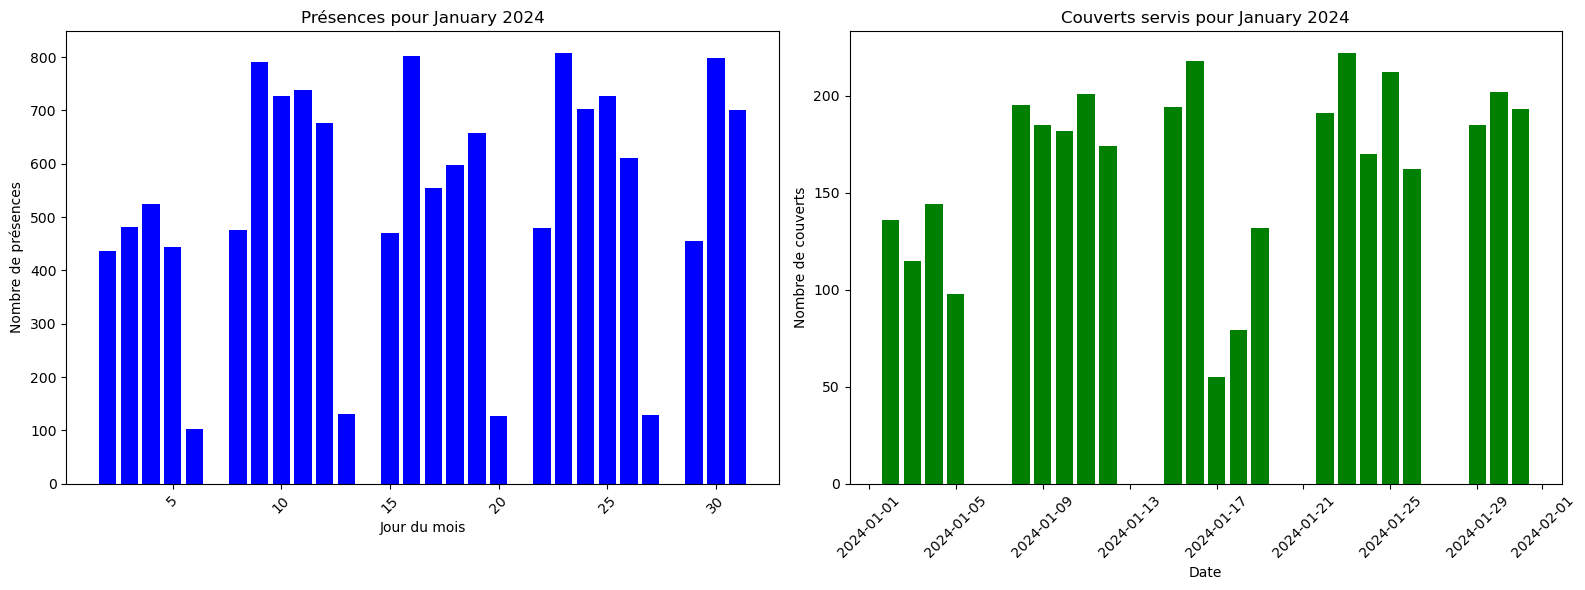

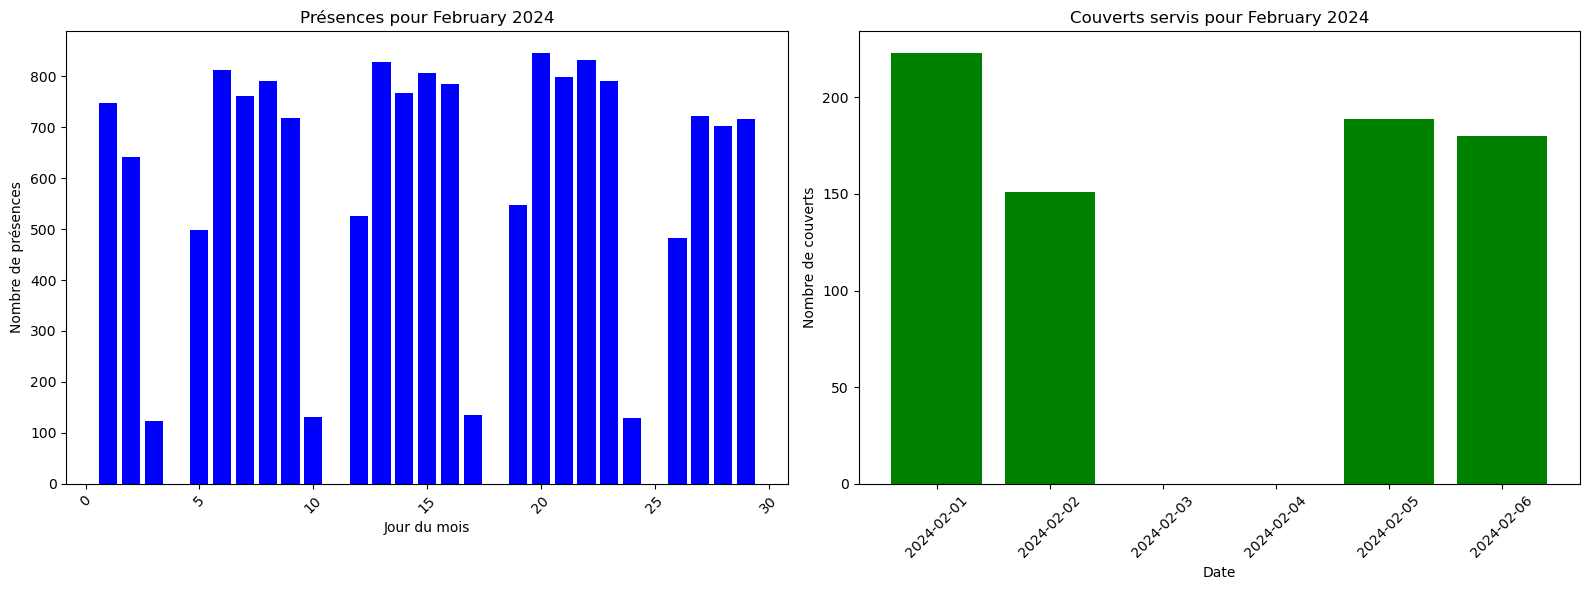

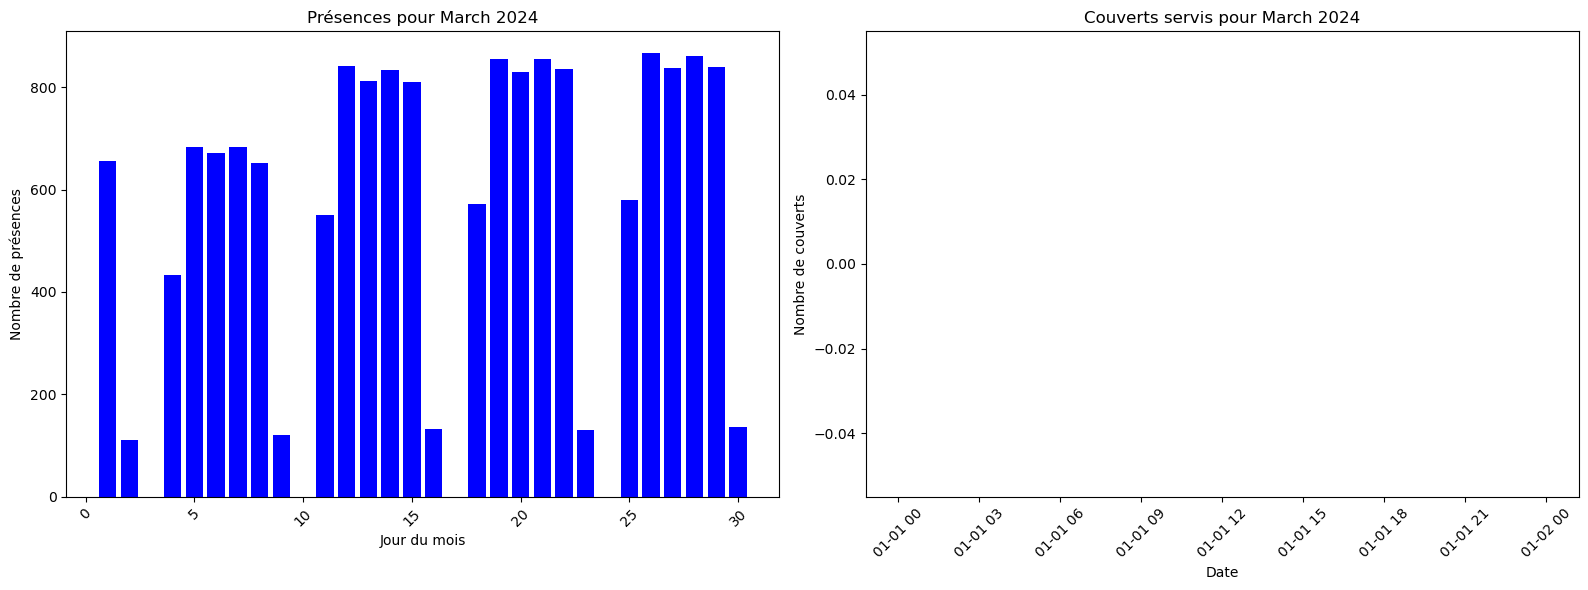

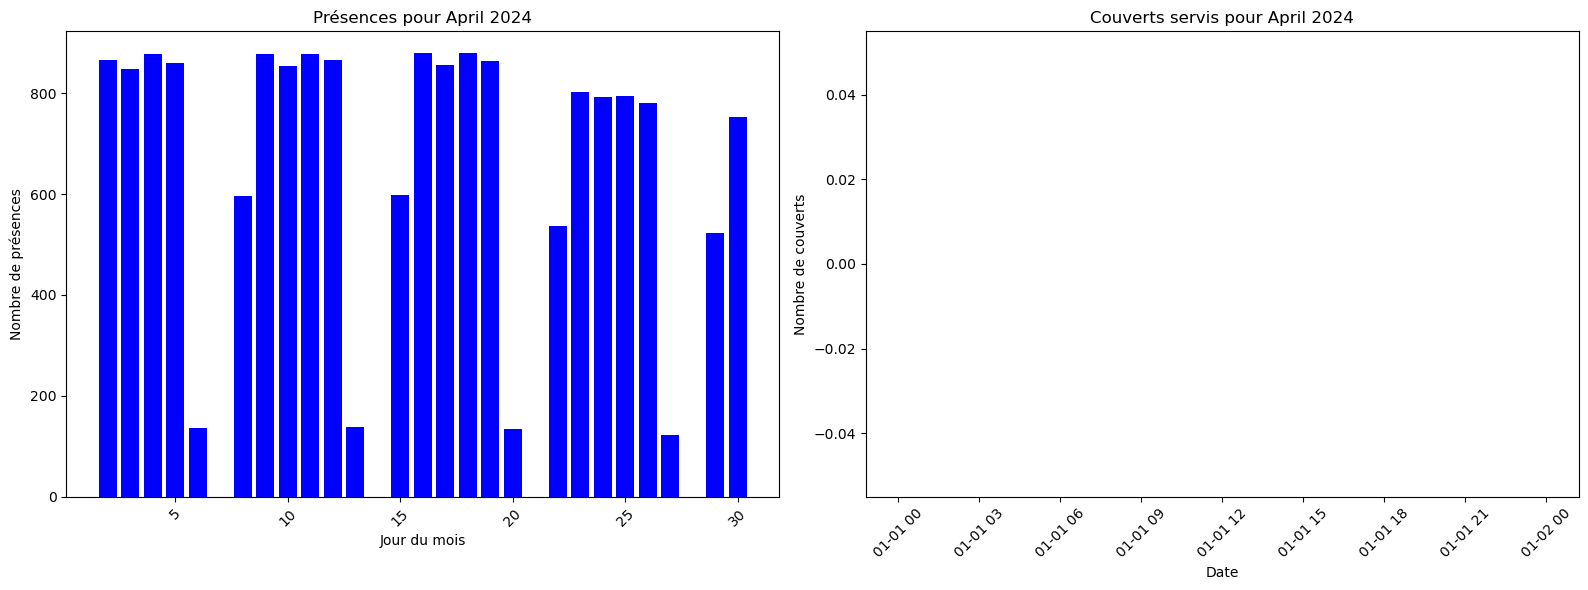

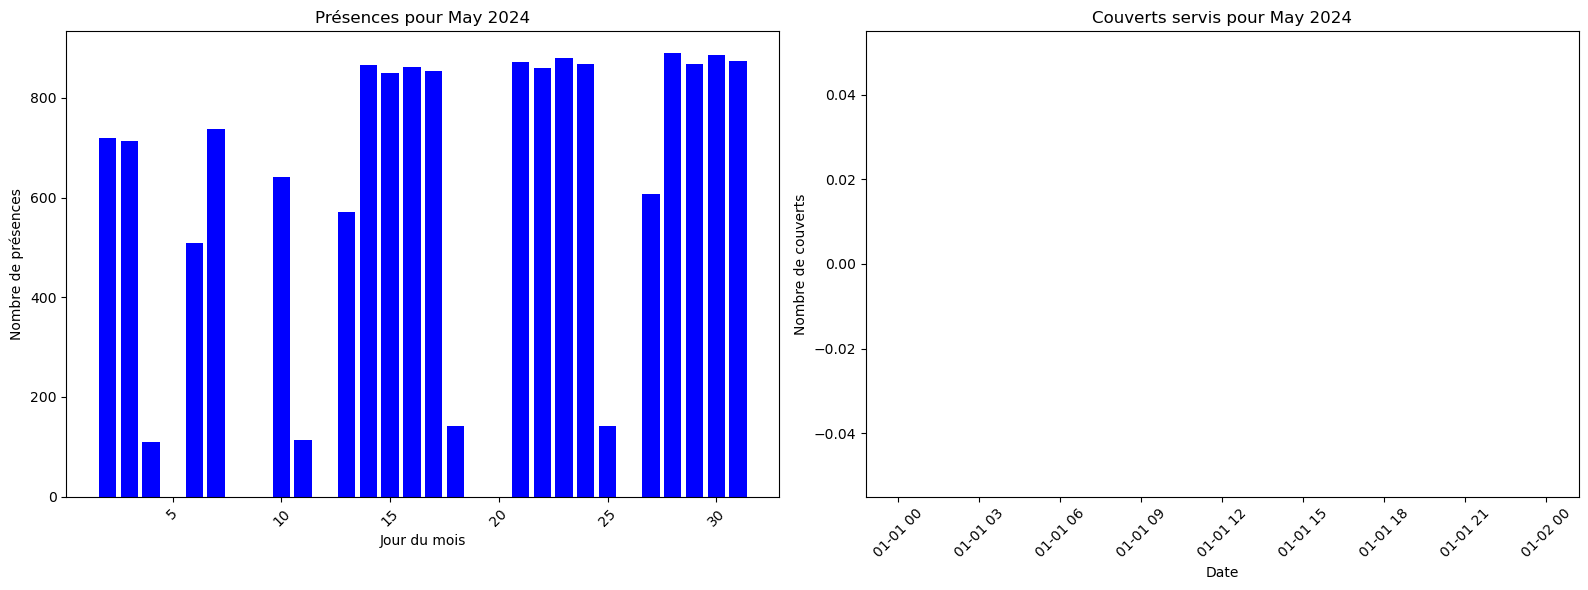

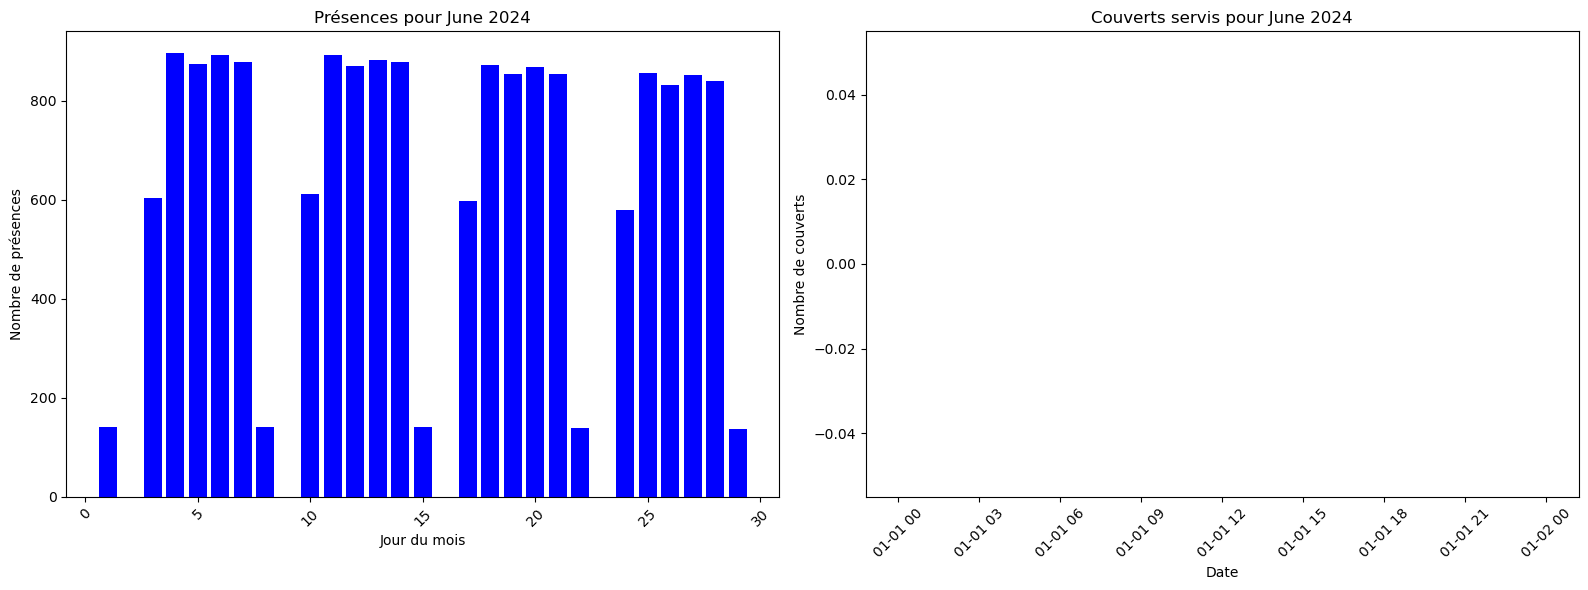

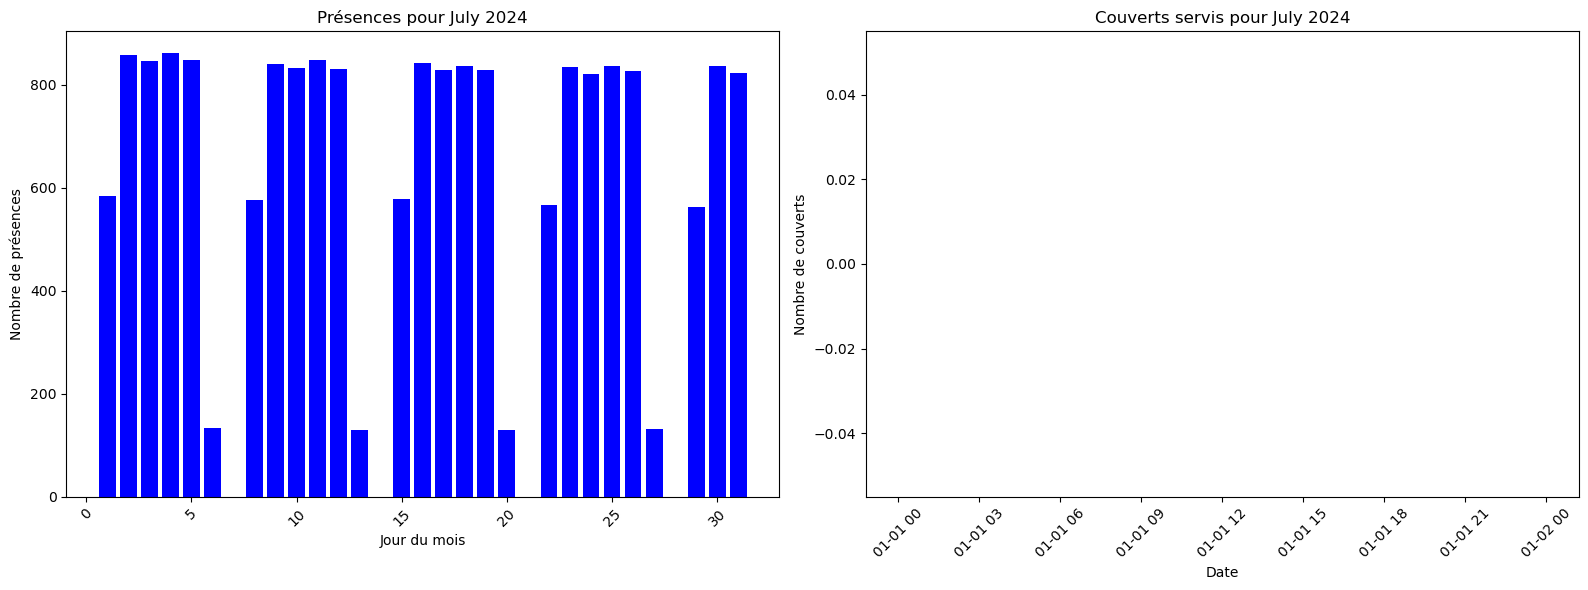

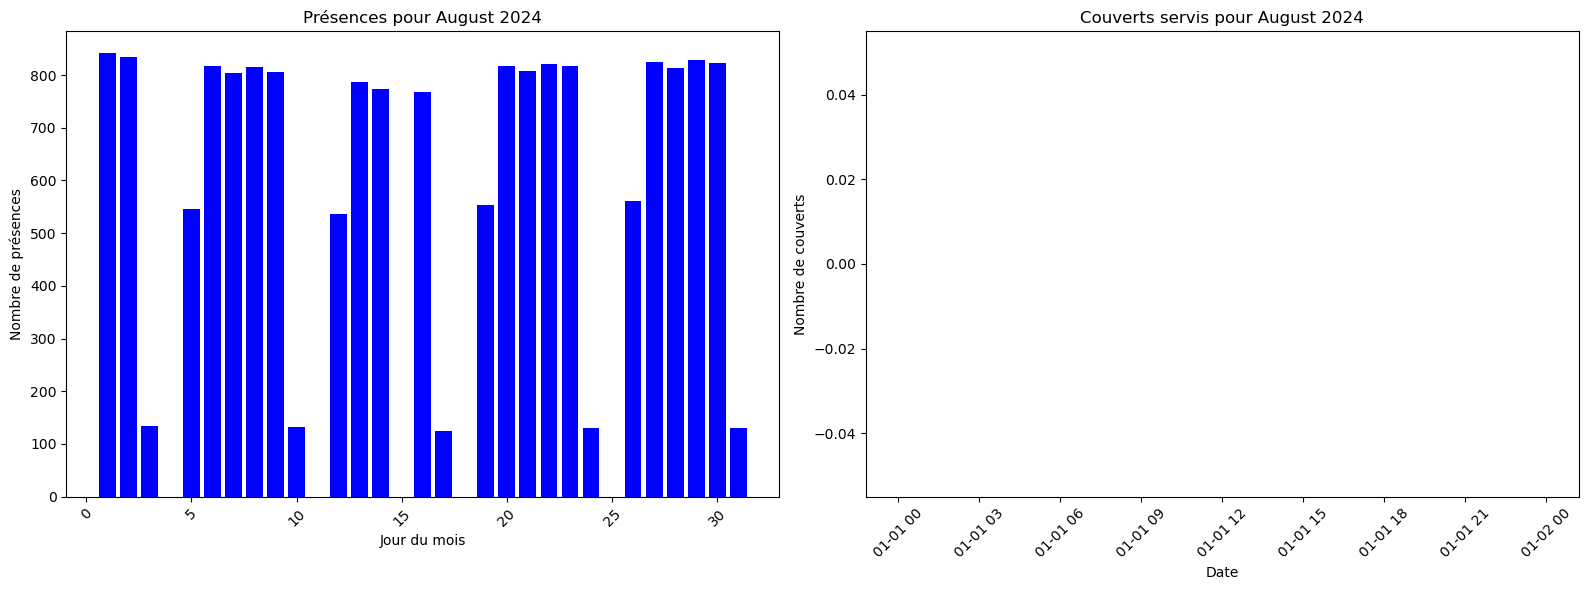

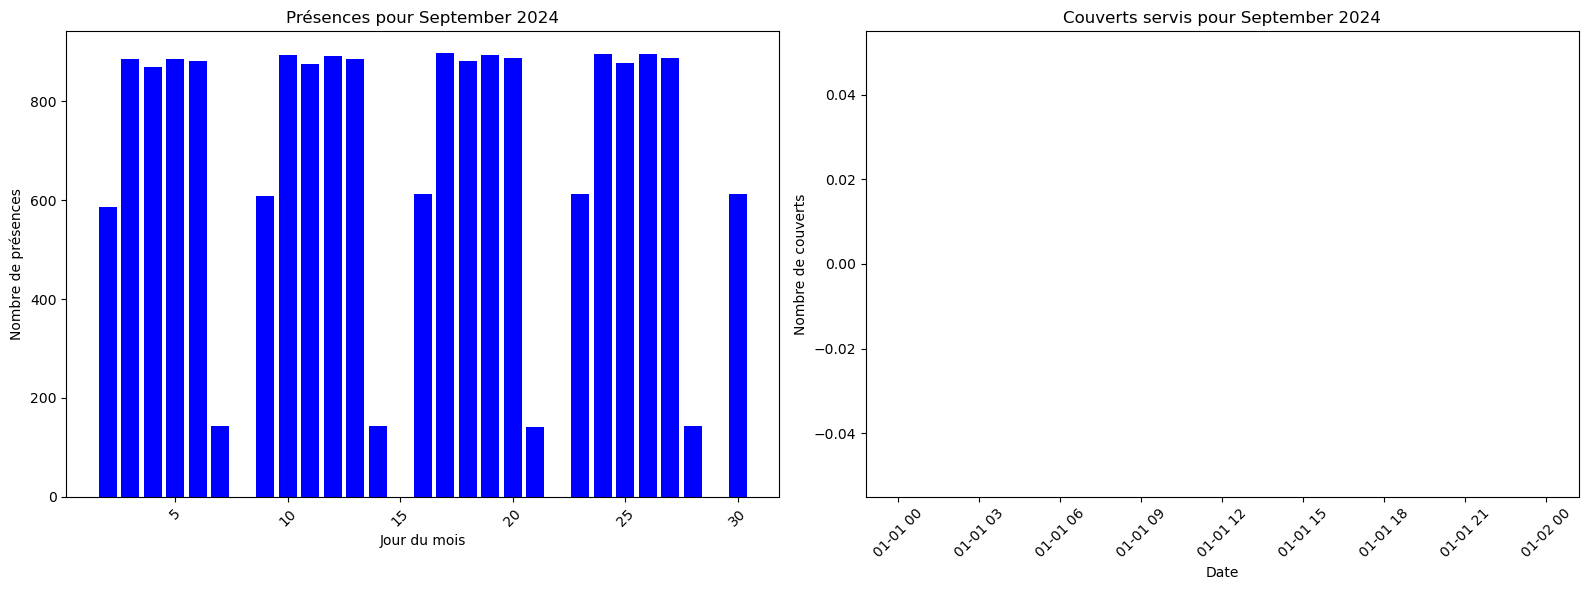

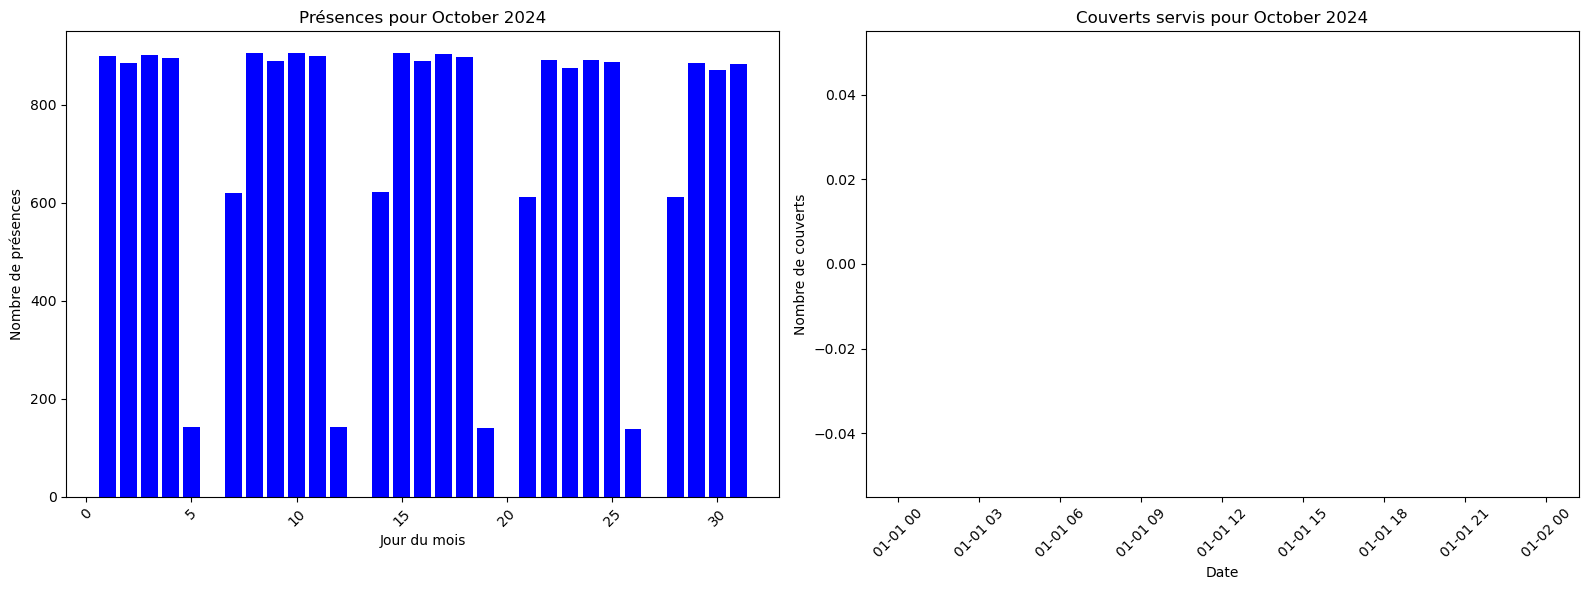

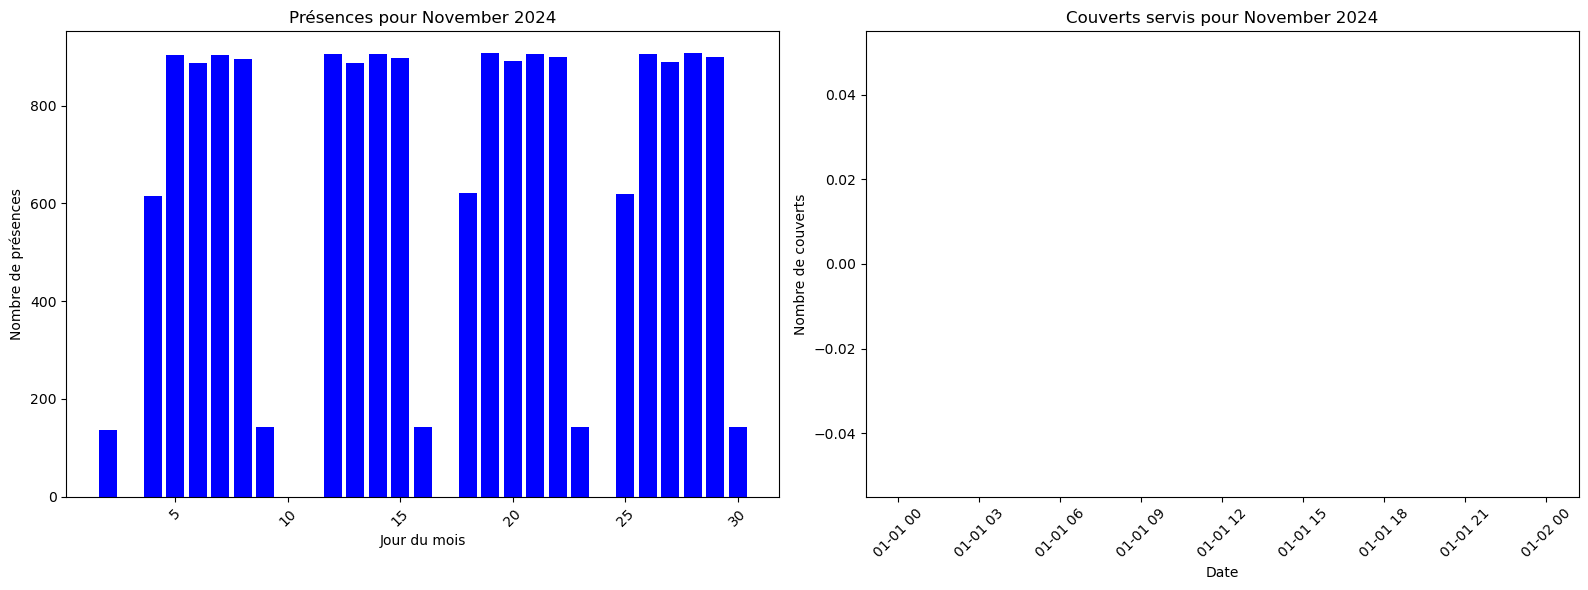

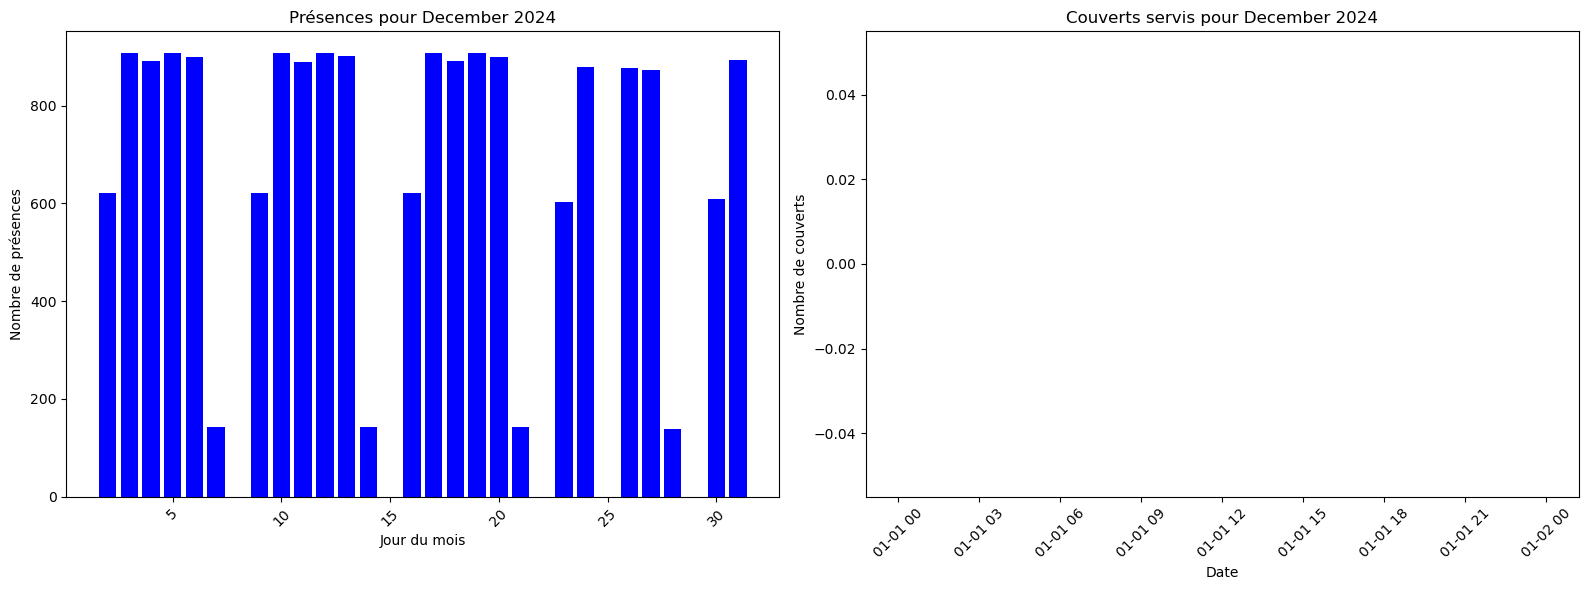

In [ ]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt

# Charger les données
df_presence = df_olga  # Assurez-vous de charger les bonnes données
df_couverts = df_API_Journalier  # Charger les données des couverts servis

# Convertir la colonne 'DATE_DEMI_J' en datetime pour les deux DataFrames
df_presence['DATE_DEMI_J'] = pd.to_datetime(df_presence['DATE_DEMI_J'], dayfirst=True)
df_couverts['DATE'] = pd.to_datetime(df_couverts['DATE'], dayfirst=True)

# Filtrer les données pour le type de présence "PS"
presence_data = df_presence[df_presence['TYPE_PRESENCE'] == 'PS']

# Itérer sur chaque mois de janvier 2023 à février 2024
for year in range(2023, 2025):
    for month in range(1, 13):
        # Filtrer les données de présence pour le mois en cours
        presence_data_month = presence_data[(presence_data['DATE_DEMI_J'].dt.year == year) & (presence_data['DATE_DEMI_J'].dt.month == month)]
        
        # Filtrer les données de couverts pour le mois en cours
        couverts_month = df_couverts[(df_couverts['DATE'].dt.year == year) & (df_couverts['DATE'].dt.month == month)]
        
        # Vérifier s'il y a des données de présence pour ce mois
        if not presence_data_month.empty:
            # Compter les occurrences de présence par jour
            presence_per_day_month = presence_data_month.groupby(presence_data_month['DATE_DEMI_J'].dt.day).size()
            
            # Créer une grille de sous-graphiques avec 1 ligne et 2 colonnes
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))
            
            # Tracer le graphique du nombre de présences par jour
            axes[0].bar(presence_per_day_month.index, presence_per_day_month.values, color='blue')
            axes[0].set_xlabel('Jour du mois')
            axes[0].set_ylabel("Nombre de présences")
            axes[0].set_title(f'Présences pour {calendar.month_name[month]} {year}')
            axes[0].tick_params(axis='x', rotation=45)
            
            # Tracer le graphique du nombre de couverts servis par jour
            axes[1].bar(couverts_month['DATE'], couverts_month['NB_COUVERTS'], color='green')
            axes[1].set_xlabel('Date')
            axes[1].set_ylabel('Nombre de couverts')
            axes[1].set_title(f'Couverts servis pour {calendar.month_name[month]} {year}')
            axes[1].tick_params(axis='x', rotation=45)
            
            plt.tight_layout()
            plt.show()


In [ ]:
# Créer une liste de dates allant de septembre 2023 à février 2024
dates = pd.date_range(start='2023-09-01', end='2024-02-06', freq='D')

# Initialiser une liste pour stocker les données
data = []

# Filtrer les données pour le type de présence "PS"
presence_data = df_olga[df_olga['TYPE_PRESENCE'] == 'PS']

# Pour chaque date, calculer le nombre de présences sur site et le nombre de couverts servis
for date in dates:
    # Filtrer les données pour la date actuelle
    presence_data_date = presence_data[presence_data['DATE_DEMI_J'].dt.date == date.date()]
    couverts_data_date = df_API_Journalier[df_API_Journalier['DATE'].dt.date == date.date()]
    
    # Calculer le nombre de présences sur site pour cette date
    nb_presence = len(presence_data_date)
    
    # Calculer le nombre de couverts servis pour cette date
    nb_couverts = couverts_data_date['NB_COUVERTS'].iloc[0] if not couverts_data_date.empty else 0
    
    # Ajouter les données à la liste
    data.append({'Date': date, 'Nb_Presence_Sur_Site': nb_presence, 'Nb_Couverts': nb_couverts})

# Créer un DataFrame à partir des données
df_cantine = pd.DataFrame(data)


In [ ]:
df_API_Journalier['DATE']

0     2023-09-01
1     2023-09-02
2     2023-09-03
3     2023-09-04
4     2023-09-05
         ...    
154   2024-02-02
155   2024-02-03
156   2024-02-04
157   2024-02-05
158   2024-02-06
Name: DATE, Length: 159, dtype: datetime64[ns]

In [ ]:
df_cantine['Nb_Couverts'] = df_cantine['Nb_Couverts'].fillna(0)
df_cantine

,Date,Nb_Presence_Sur_Site,Nb_Couverts
0,2023-09-01,492,80.0
1,2023-09-02,101,0.0
2,2023-09-03,0,0.0
3,2023-09-04,408,147.0
4,2023-09-05,706,160.0
...,...,...,...
154,2024-02-02,642,151.0
155,2024-02-03,123,0.0
156,2024-02-04,0,0.0
157,2024-02-05,499,189.0


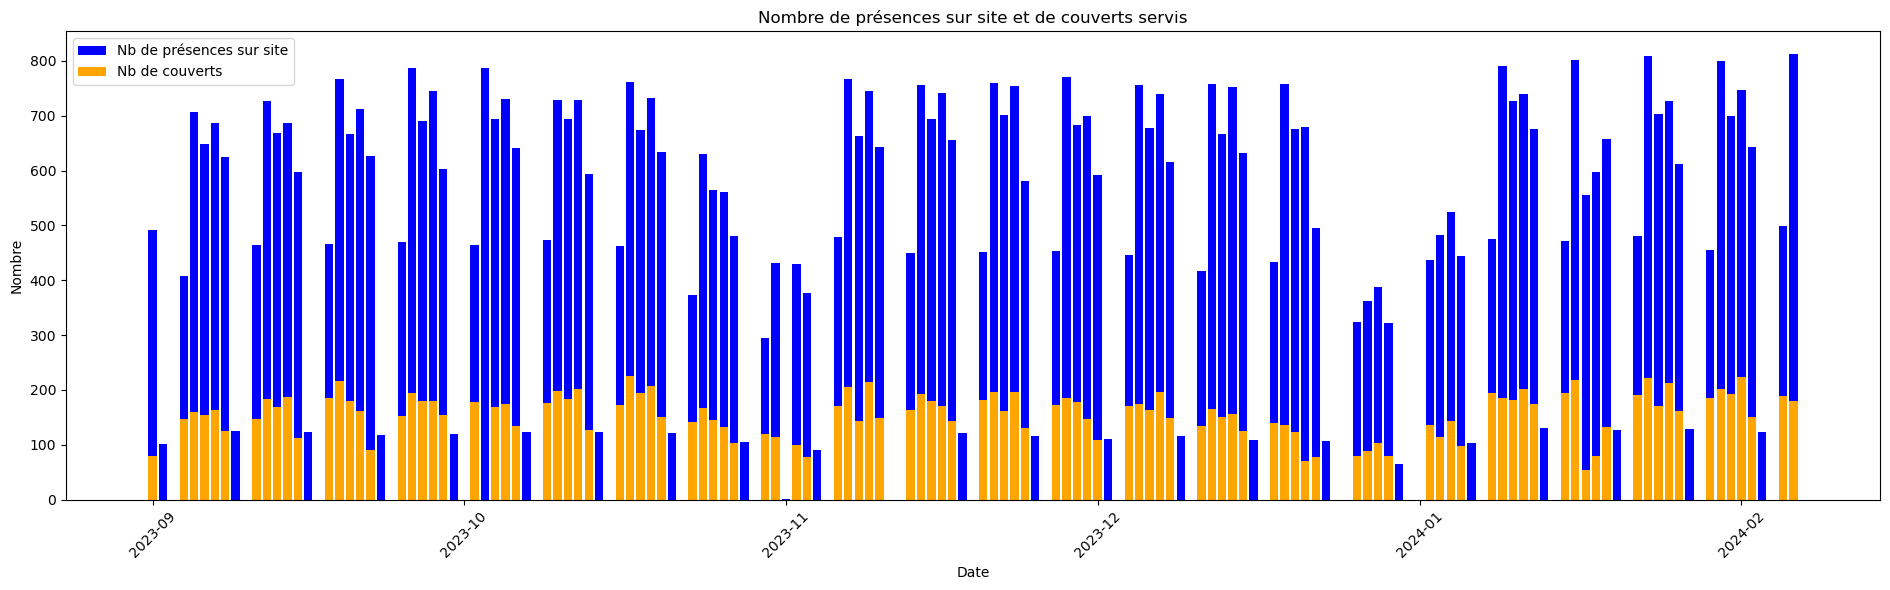

In [ ]:
import matplotlib.pyplot as plt

# Extraire les données de la DataFrame
dates = df_cantine['Date']
nb_presence_sur_site = df_cantine['Nb_Presence_Sur_Site']
nb_couverts = df_cantine['Nb_Couverts']

# Créer le graphique en barres
plt.figure(figsize=(19, 6))

# Barres pour le nombre de présences sur site (en bleu)
plt.bar(dates, nb_presence_sur_site, color='blue', label='Nb de présences sur site')

# Barres pour le nombre de couverts (en orange)
plt.bar(dates, nb_couverts, color='orange', label='Nb de couverts')

# Ajouter des étiquettes et légendes
plt.xlabel('Date')
plt.ylabel('Nombre')
plt.title('Nombre de présences sur site et de couverts servis')
plt.xticks(rotation=45)
plt.legend()

# Afficher le graphique
plt.tight_layout()
plt.show()

In [ ]:
df_cantine.to_csv('Csv/df_cantine.csv', index=False)

In [ ]:
import pyodbc
from dotenv import load_dotenv
import os

# Charger les variables d'environnement à partir du fichier .env
load_dotenv()

# Utiliser les variables d'environnement pour les paramètres de connexion
server = os.getenv("SERVER")
database = os.getenv("DATABASE")
user = os.getenv("AZUREUSER")
password = os.getenv("PASSWORD")

# Chaîne de connexion à la base de données
conn_str = f'DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};UID={user};PWD={password}'

In [ ]:
df_olga.to_csv('Csv/df_olga.csv', index=False)

In [ ]:
df_olga.to_sql('CleanDataset', conn_str, index=False, if_exists='replace')

ArgumentError: Could not parse SQLAlchemy URL from string 'DRIVER=ODBC Driver 17 for SQL Server;SERVER=optimeal.database.windows.net;DATABASE=optimeal;UID=admin_agathe;PWD=Maison65'

# Météo

In [ ]:
# Endpoint de l'API
URL = "https://public.opendatasoft.com/api/records/1.0/search/"
ressource = "?dataset=donnees-synop-essentielles-omm&q="
station = f"&refine.nom=ORLY"

In [ ]:
start_date = '2023-09-01'
end_date = '2024-02-06'

# Créer l'URL de l'API à partir des dates de début et de fin
date_fork = f"date%3A%5B{start_date}+TO+{end_date}%5D"
row_limit = "&rows=10000"
endpoint = URL + ressource + date_fork + row_limit + station

In [ ]:
import requests
response = requests.get(endpoint)

In [ ]:
# Calculer la moyenne des températures pour chaque jour à 12h
daily_temperatures = []
for record in response.json()["records"]:
    date_time = record["fields"]["date"]  # Extraire la date et l'heure complètes
    if date_time.endswith("T12:00:00+00:00"):  # Vérifier si l'heure est 12:00:00
        date = date_time[:10]  # Extraire uniquement la date au format YYYY-MM-DD
        if "tc" not in record["fields"]:
            continue  # Passer à l'itération suivante si la clé "tc" n'est pas présente
        temperature = record["fields"]["tc"]
        temperature = round(temperature, 1) 
        daily_temperatures.append({'date': date, 'temperature': temperature})

# Créer un DataFrame à partir des données
df_temperature = pd.DataFrame(daily_temperatures)

In [ ]:
df_temperature = df_temperature.sort_values(by='date')
df_temperature

,date,temperature
38,2023-09-01,21.8
99,2023-09-02,28.8
39,2023-09-03,30.0
76,2023-09-04,30.0
53,2023-09-05,31.5
...,...,...
28,2024-02-02,7.7
92,2024-02-03,9.9
41,2024-02-04,9.7
93,2024-02-05,8.2


In [ ]:
df_temperature.to_csv('Csv/df_temperature.csv', index=False)